<a href="https://colab.research.google.com/github/satvik-venkatesh/word-eq/blob/main/audio-and-word-embeddings-error-plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!tar -xjvf "/content/dict2vec300.tar.bz2" -C "/content/" 

dict2vec-300d.vec


In [ ]:
# !cp "/content/drive/MyDrive/audio-and-word-embeddings/eq_contributions.csv" .

In [ ]:
import os
import pathlib
import numpy as np
import tensorflow as tf
from tensorflow import keras
import csv
from collections import Counter
import random
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding
import matplotlib.pyplot as plt

!pip install similaritymeasures
import similaritymeasures

     |████████████████████████████████| 395 kB 5.0 MB/s 
  Created wheel for similaritymeasures: filename=similaritymeasures-0.4.4-py3-none-any.whl size=14557 sha256=eba6b5a040d58b4bf0d521d078f49f0e26bffa16ac3930a7dc90ae4b0d96cb62
  Stored in directory: /root/.cache/pip/wheels/a9/3a/35/009cc44db92a3500424a89baac7e77c219a44209c67f867a1e
Successfully built similaritymeasures


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def read_annotation(filename):
    events = []
    with open(filename, 'r') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            events.append(row)
    return events

In [ ]:
events = read_annotation("/content/drive/MyDrive/audio-and-word-embeddings/eq_contributions.csv")
len(events)

1596

In [ ]:
words_list = [e[0].lower() for e in events[1:] if e[1] == "English"]

In [ ]:
len(words_list)

918

In [ ]:
hq_words = ["bright","brittle","clear","crisp","harsh","hollow","sharp","shrill","tinny","woody","big","boom","boxy","dark","dull","fat","full","muddy","muffled","punch","smooth","sweet","warm","flat",
            "crunchy","deep","soothing","clean","airy","cold","metallic","booming"]

In [ ]:
len(hq_words)

32

In [ ]:
words_list[0:10]

['hot',
 'wet',
 'slow',
 'saucy',
 'heavy',
 'shrill',
 'warm',
 'chill',
 'sharp',
 'corn']

In [ ]:
high_rated_words = list(set([e[0].lower() for e in events[1:] if e[1] == "English" and float(e[3]) > 0.7 and e[0].lower() not in hq_words]))
high_rated_words.sort()

In [ ]:
high_rated_words

['aggressive',
 'baseball',
 'beautiful',
 'biting',
 'bold',
 'brash',
 'brass',
 'brassy',
 'breezy',
 'calm',
 'caring',
 'cheerful',
 'clarity',
 'cooing',
 'cool',
 'cute',
 'disgusting',
 'down',
 'edge',
 'edgy',
 'enchanting',
 'energetic',
 'energizing',
 'excited',
 'exciting',
 'fancy',
 'fluffy',
 'forceful',
 'frigid',
 'funky',
 'genius',
 'gentle',
 'good',
 'gruff',
 'happy',
 'hard',
 'heart-warming',
 'heat',
 'heavy',
 'hot',
 'huge',
 'icy',
 'jagged',
 'large',
 'light',
 'loud',
 'love',
 'low',
 'mellow',
 'mournful',
 'noisy',
 'passionate',
 'peace',
 'peaceful',
 'pleasing',
 'pleasurable',
 'plodding',
 'poor',
 'punchy',
 'quiet',
 'radiant',
 'relaxing',
 'reserved',
 'rich',
 'romantic',
 'rousing',
 'rumble',
 'serene',
 'sloppy',
 'slow',
 'soft',
 'solemn',
 'splash',
 'squeaking',
 'strong',
 'taco',
 'techno',
 'tense',
 'throbbing',
 'thumpy',
 'thunderous',
 'twangy',
 'velvety',
 'whispered',
 'whispering',
 'wistful']

In [ ]:
len(high_rated_words)

86

In [ ]:
# 5, 19, 71
# Using seed 137 for shuffling into folds
random.seed(137)
random.shuffle(hq_words)
random.shuffle(high_rated_words)
#test_word_set = hq_words[0:10] + high_rated_words[0:30]

In [ ]:
test_word_set_1 = hq_words[0:9] + high_rated_words[0:22]
test_word_set_2 = hq_words[9:18] + high_rated_words[22:44]
test_word_set_3 = hq_words[18:27] + high_rated_words[44:66]

In [ ]:
test_word_set_4 = hq_words[27:] + hq_words[0:4] + high_rated_words[66:] + high_rated_words[0:2]

In [ ]:
test_word_set_4

['sharp',
 'big',
 'dark',
 'hollow',
 'harsh',
 'smooth',
 'muffled',
 'crisp',
 'punch',
 'mournful',
 'clarity',
 'genius',
 'bold',
 'twangy',
 'soft',
 'splash',
 'slow',
 'wistful',
 'brash',
 'fancy',
 'cute',
 'rousing',
 'loud',
 'breezy',
 'large',
 'passionate',
 'baseball',
 'huge',
 'icy',
 'brassy',
 'caring']

In [ ]:
"string-Tase".lower()

'string-tase'

In [ ]:
cc = dict(Counter(words_list))

In [ ]:
words_set = list(cc.keys())
words_set.sort()

In [ ]:
cc

{'aggravating': 2,
 'aggressive': 4,
 'agitated': 1,
 'aidan': 1,
 'airy': 3,
 'alluring': 1,
 'anger': 1,
 'angry': 2,
 'annoying': 1,
 'anticipation': 1,
 'apple': 1,
 'archaic': 1,
 'awesome': 2,
 'awkward': 1,
 'bag': 1,
 'balanced': 1,
 'bang': 1,
 'baseball': 1,
 'bassy': 1,
 'bear': 1,
 'beautiful': 10,
 'big': 1,
 'biting': 1,
 'blaring': 1,
 'blast': 1,
 'boisterous': 1,
 'bold': 2,
 'bonito': 1,
 'boom': 1,
 'booming': 1,
 'bored': 1,
 'bouncy': 1,
 'boxy': 1,
 'brash': 1,
 'brass': 1,
 'brassy': 2,
 'brave': 1,
 'breezy': 1,
 'bright': 19,
 'brillante': 1,
 'brittle': 1,
 'buzz': 2,
 'calm': 13,
 'car': 1,
 'carefree': 1,
 'caring': 1,
 'cat': 2,
 'caustic': 1,
 'cerebral': 1,
 'charming': 1,
 'cheerful': 3,
 'cheery': 1,
 'children': 1,
 'chill': 1,
 'chilly': 1,
 'choppy': 1,
 'chunky': 2,
 'clarity': 1,
 'clash': 1,
 'classic': 2,
 'classy': 1,
 'clean': 4,
 'clear': 12,
 'coarse': 1,
 'cold': 34,
 'computer': 1,
 'confident': 1,
 'congested': 1,
 'cooing': 1,
 'cool': 14

In [ ]:
len(words_set)

388

In [ ]:
ss = set(["kk", "hellos"])

In [ ]:
"hello" not in ss

True

In [ ]:
test_word_set_4

['sharp',
 'big',
 'dark',
 'hollow',
 'harsh',
 'smooth',
 'muffled',
 'crisp',
 'punch',
 'mournful',
 'clarity',
 'genius',
 'bold',
 'twangy',
 'soft',
 'splash',
 'slow',
 'wistful',
 'brash',
 'fancy',
 'cute',
 'rousing',
 'loud',
 'breezy',
 'large',
 'passionate',
 'baseball',
 'huge',
 'icy',
 'brassy',
 'caring']

# Change the fold_no below here

In [ ]:
fold_no = 4

train_word_set = [w for w in words_set if w not in test_word_set_4]
train_events = [e for e in events[1:] if e[1] == "English" and e[0].lower() in train_word_set]
test_events = [e for e in events[1:] if e[1] == "English" and e[0].lower() in test_word_set_4 and float(e[3]) > 0.7]

train_samples = [e[0].lower() for e in train_events]
train_labels = [e[4:] for e in train_events]

test_samples = [e[0].lower() for e in test_events]
test_labels = [e[4:] for e in test_events]

vec2 = TextVectorization(max_tokens=400010, output_sequence_length=1)
eq_ds = tf.data.Dataset.from_tensor_slices(words_set).batch(128)
vec2.adapt(eq_ds)

voc2 = vec2.get_vocabulary()
word_index_2 = dict(zip(voc2, range(len(voc2))))

x_train = vec2(np.array([[s] for s in train_samples])).numpy()
#x_val = vec2(np.array([[s] for s in val_samples])).numpy()
x_test = vec2(np.array([[s] for s in test_samples])).numpy()

y_train = np.array(train_labels, dtype='float')[:, :]
#y_val = np.array(val_labels, dtype='float')[:, :]
y_test = np.array(test_labels, dtype='float')[:, :]

mmin = np.ones((40,)) * -4
mmax = np.ones((40,)) * 4

y_train = (y_train - mmin) / (mmax - mmin)
y_test = (y_test - mmin) / (mmax - mmin)

initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)



def mean_abs_error_0(y_true, y_pred):
  diff = tf.abs(y_pred[:, 0] - y_true[:, 0])
  return tf.reduce_mean(diff)

def mean_abs_error_1(y_true, y_pred):
  diff = tf.abs(y_pred[:, 1] - y_true[:, 1])
  return tf.reduce_mean(diff)

def mean_abs_error_2(y_true, y_pred):
  diff = tf.abs(y_pred[:, 2] - y_true[:, 2])
  return tf.reduce_mean(diff)

def mean_abs_error_3(y_true, y_pred):
  diff = tf.abs(y_pred[:, 3] - y_true[:, 3])
  return tf.reduce_mean(diff)

def mean_abs_error_4(y_true, y_pred):
  diff = tf.abs(y_pred[:, 4] - y_true[:, 4])
  return tf.reduce_mean(diff)

def mean_abs_error_5(y_true, y_pred):
  diff = tf.abs(y_pred[:, 5] - y_true[:, 5])
  return tf.reduce_mean(diff)

def mean_abs_error_6(y_true, y_pred):
  diff = tf.abs(y_pred[:, 6] - y_true[:, 6])
  return tf.reduce_mean(diff)

def mean_abs_error_7(y_true, y_pred):
  diff = tf.abs(y_pred[:, 7] - y_true[:, 7])
  return tf.reduce_mean(diff)

def mean_abs_error_8(y_true, y_pred):
  diff = tf.abs(y_pred[:, 8] - y_true[:, 8])
  return tf.reduce_mean(diff)

def mean_abs_error_9(y_true, y_pred):
  diff = tf.abs(y_pred[:, 9] - y_true[:, 9])
  return tf.reduce_mean(diff)

def mean_abs_error_10(y_true, y_pred):
  diff = tf.abs(y_pred[:, 10] - y_true[:, 10])
  return tf.reduce_mean(diff)

def mean_abs_error_11(y_true, y_pred):
  diff = tf.abs(y_pred[:, 11] - y_true[:, 11])
  return tf.reduce_mean(diff)

def mean_abs_error_12(y_true, y_pred):
  diff = tf.abs(y_pred[:, 12] - y_true[:, 12])
  return tf.reduce_mean(diff)

def mean_abs_error_13(y_true, y_pred):
  diff = tf.abs(y_pred[:, 13] - y_true[:, 13])
  return tf.reduce_mean(diff)

def mean_abs_error_14(y_true, y_pred):
  diff = tf.abs(y_pred[:, 14] - y_true[:, 14])
  return tf.reduce_mean(diff)

def mean_abs_error_15(y_true, y_pred):
  diff = tf.abs(y_pred[:, 15] - y_true[:, 15])
  return tf.reduce_mean(diff)

def mean_abs_error_16(y_true, y_pred):
  diff = tf.abs(y_pred[:, 16] - y_true[:, 16])
  return tf.reduce_mean(diff)

def mean_abs_error_17(y_true, y_pred):
  diff = tf.abs(y_pred[:, 17] - y_true[:, 17])
  return tf.reduce_mean(diff)

def mean_abs_error_18(y_true, y_pred):
  diff = tf.abs(y_pred[:, 18] - y_true[:, 18])
  return tf.reduce_mean(diff)

def mean_abs_error_19(y_true, y_pred):
  diff = tf.abs(y_pred[:, 19] - y_true[:, 19])
  return tf.reduce_mean(diff)

def mean_abs_error_20(y_true, y_pred):
  diff = tf.abs(y_pred[:, 20] - y_true[:, 20])
  return tf.reduce_mean(diff)

def mean_abs_error_21(y_true, y_pred):
  diff = tf.abs(y_pred[:, 21] - y_true[:, 21])
  return tf.reduce_mean(diff)

def mean_abs_error_22(y_true, y_pred):
  diff = tf.abs(y_pred[:, 22] - y_true[:, 22])
  return tf.reduce_mean(diff)

def mean_abs_error_23(y_true, y_pred):
  diff = tf.abs(y_pred[:, 23] - y_true[:, 23])
  return tf.reduce_mean(diff)

def mean_abs_error_24(y_true, y_pred):
  diff = tf.abs(y_pred[:, 24] - y_true[:, 24])
  return tf.reduce_mean(diff)

def mean_abs_error_25(y_true, y_pred):
  diff = tf.abs(y_pred[:, 25] - y_true[:, 25])
  return tf.reduce_mean(diff)

def mean_abs_error_26(y_true, y_pred):
  diff = tf.abs(y_pred[:, 26] - y_true[:, 26])
  return tf.reduce_mean(diff)

def mean_abs_error_27(y_true, y_pred):
  diff = tf.abs(y_pred[:, 27] - y_true[:, 27])
  return tf.reduce_mean(diff)

def mean_abs_error_28(y_true, y_pred):
  diff = tf.abs(y_pred[:, 28] - y_true[:, 28])
  return tf.reduce_mean(diff)

def mean_abs_error_29(y_true, y_pred):
  diff = tf.abs(y_pred[:, 29] - y_true[:, 29])
  return tf.reduce_mean(diff)

def mean_abs_error_30(y_true, y_pred):
  diff = tf.abs(y_pred[:, 30] - y_true[:, 30])
  return tf.reduce_mean(diff)

def mean_abs_error_31(y_true, y_pred):
  diff = tf.abs(y_pred[:, 31] - y_true[:, 31])
  return tf.reduce_mean(diff)

def mean_abs_error_32(y_true, y_pred):
  diff = tf.abs(y_pred[:, 32] - y_true[:, 32])
  return tf.reduce_mean(diff)

def mean_abs_error_33(y_true, y_pred):
  diff = tf.abs(y_pred[:, 33] - y_true[:, 33])
  return tf.reduce_mean(diff)

def mean_abs_error_34(y_true, y_pred):
  diff = tf.abs(y_pred[:, 34] - y_true[:, 34])
  return tf.reduce_mean(diff)

def mean_abs_error_35(y_true, y_pred):
  diff = tf.abs(y_pred[:, 35] - y_true[:, 35])
  return tf.reduce_mean(diff)

def mean_abs_error_36(y_true, y_pred):
  diff = tf.abs(y_pred[:, 36] - y_true[:, 36])
  return tf.reduce_mean(diff)

def mean_abs_error_37(y_true, y_pred):
  diff = tf.abs(y_pred[:, 37] - y_true[:, 37])
  return tf.reduce_mean(diff)

def mean_abs_error_38(y_true, y_pred):
  diff = tf.abs(y_pred[:, 38] - y_true[:, 38])
  return tf.reduce_mean(diff)

def mean_abs_error_39(y_true, y_pred):
  diff = tf.abs(y_pred[:, 39] - y_true[:, 39])
  return tf.reduce_mean(diff)

In [ ]:
test_samples

['soft',
 'mournful',
 'soft',
 'crisp',
 'soft',
 'loud',
 'breezy',
 'brash',
 'muffled',
 'huge',
 'cute',
 'icy',
 'soft',
 'passionate',
 'dark',
 'caring',
 'loud',
 'loud',
 'crisp',
 'twangy',
 'rousing',
 'large',
 'soft',
 'clarity',
 'soft',
 'loud',
 'bold',
 'muffled',
 'wistful',
 'loud',
 'hollow',
 'sharp',
 'loud',
 'loud',
 'harsh',
 'smooth',
 'soft',
 'soft',
 'harsh',
 'harsh',
 'brassy',
 'soft',
 'soft',
 'genius',
 'soft',
 'splash',
 'soft',
 'muffled',
 'soft',
 'fancy',
 'baseball',
 'slow']

In [ ]:
"""
Currently the best performance is when having a 4-unit layer in between with LeakyRelu activations, SGD optimizer with LR of 0.001.
In one of the random restarts, it reached ~ 0.93.
It was better with augmentation of GaussianNoise(0.3) and above learning rate schedule [0.01, 5000, 0.96].
"""

# SPacy model

num_tokens = 390
embedding_dim = 300

embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
  #  embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    # embeddings_initializer=keras.initializers.RandomNormal(stddev=0.01),
    trainable=True,
)

int_sequences_input = keras.Input(shape=(1,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = embedded_sequences
# x = layers.GlobalMaxPooling1D()(x)
x = layers.Lambda(lambda xx: tf.squeeze(xx, axis=-2))(x)
x = layers.Dense(300, activation="relu")(x)
x = layers.Dropout(0.05)(x)
x = layers.Dense(200, activation="relu")(x)
x = layers.Dropout(0.05)(x)
x = layers.Dense(100, activation="relu")(x)
x = layers.Dropout(0.05)(x)
x = layers.Dense(80, activation="relu")(x)
x = layers.Dropout(0.05)(x)
x = layers.Dense(60, activation="relu")(x)
x = layers.Dropout(0.05)(x)
# x = layers.Dense(40, activation="relu")(x)
# x = layers.Dropout(0.05)(x)
preds = layers.Dense(40, activation="sigmoid")(x)
model_spacy = keras.Model(int_sequences_input, preds)
model_spacy.summary()

model_spacy.compile(
    loss=tf.keras.losses.MeanAbsoluteError(), optimizer=keras.optimizers.SGD(learning_rate=lr_schedule), 
    metrics=[mean_abs_error_0,
             mean_abs_error_1,
             mean_abs_error_2,
             mean_abs_error_3,
             mean_abs_error_4,
             mean_abs_error_5,
             mean_abs_error_6,
             mean_abs_error_7,
             mean_abs_error_8,
             mean_abs_error_9,
             mean_abs_error_10,
             mean_abs_error_11,
             mean_abs_error_12,
             mean_abs_error_13,
             mean_abs_error_14,
             mean_abs_error_15,
             mean_abs_error_16,
             mean_abs_error_17,
             mean_abs_error_18,
             mean_abs_error_19,
             mean_abs_error_20,
             mean_abs_error_21,
             mean_abs_error_22,
             mean_abs_error_23,
             mean_abs_error_24,
             mean_abs_error_25,
             mean_abs_error_26,
             mean_abs_error_27,
             mean_abs_error_28,
             mean_abs_error_29,
             mean_abs_error_30,   
             mean_abs_error_31,
             mean_abs_error_32,
             mean_abs_error_33,
             mean_abs_error_34,
             mean_abs_error_35,
             mean_abs_error_36,
             mean_abs_error_37,
             mean_abs_error_38,
             mean_abs_error_39,                                               
tf.keras.losses.MeanAbsolutePercentageError(
    reduction="auto", name="mean_absolute_percentage_error")
]
)

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 1)]               0         
                                                                 
 embedding_15 (Embedding)    (None, 1, 300)            117000    
                                                                 
 lambda_15 (Lambda)          (None, 300)               0         
                                                                 
 dense_90 (Dense)            (None, 300)               90300     
                                                                 
 dropout_75 (Dropout)        (None, 300)               0         
                                                                 
 dense_91 (Dense)            (None, 200)               60200     
                                                                 
 dropout_76 (Dropout)        (None, 200)               0  

In [ ]:
"""
Currently the best performance is when having a 4-unit layer in between with LeakyRelu activations, SGD optimizer with LR of 0.001.
In one of the random restarts, it reached ~ 0.93.
It was better with augmentation of GaussianNoise(0.3) and above learning rate schedule [0.01, 5000, 0.96].
"""

# Glove-840 model

num_tokens = 392
embedding_dim = 300

embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
  #  embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    # embeddings_initializer=keras.initializers.RandomNormal(stddev=0.01),
    trainable=True,
)

int_sequences_input = keras.Input(shape=(1,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = embedded_sequences
# x = layers.GlobalMaxPooling1D()(x)
x = layers.Lambda(lambda xx: tf.squeeze(xx, axis=-2))(x)
x = layers.Dense(300, activation="relu")(x)
x = layers.Dropout(0.05)(x)
x = layers.Dense(200, activation="relu")(x)
x = layers.Dropout(0.05)(x)
x = layers.Dense(100, activation="relu")(x)
x = layers.Dropout(0.05)(x)
x = layers.Dense(80, activation="relu")(x)
x = layers.Dropout(0.05)(x)
x = layers.Dense(60, activation="relu")(x)
x = layers.Dropout(0.05)(x)
# x = layers.Dense(40, activation="relu")(x)
# x = layers.Dropout(0.05)(x)
preds = layers.Dense(40, activation="sigmoid")(x)
model_glove = keras.Model(int_sequences_input, preds)
model_glove.summary()

model_glove.compile(
    loss=tf.keras.losses.MeanAbsoluteError(), optimizer=keras.optimizers.SGD(learning_rate=lr_schedule), 
    metrics=[mean_abs_error_0,
             mean_abs_error_1,
             mean_abs_error_2,
             mean_abs_error_3,
             mean_abs_error_4,
             mean_abs_error_5,
             mean_abs_error_6,
             mean_abs_error_7,
             mean_abs_error_8,
             mean_abs_error_9,
             mean_abs_error_10,
             mean_abs_error_11,
             mean_abs_error_12,
             mean_abs_error_13,
             mean_abs_error_14,
             mean_abs_error_15,
             mean_abs_error_16,
             mean_abs_error_17,
             mean_abs_error_18,
             mean_abs_error_19,
             mean_abs_error_20,
             mean_abs_error_21,
             mean_abs_error_22,
             mean_abs_error_23,
             mean_abs_error_24,
             mean_abs_error_25,
             mean_abs_error_26,
             mean_abs_error_27,
             mean_abs_error_28,
             mean_abs_error_29,
             mean_abs_error_30,   
             mean_abs_error_31,
             mean_abs_error_32,
             mean_abs_error_33,
             mean_abs_error_34,
             mean_abs_error_35,
             mean_abs_error_36,
             mean_abs_error_37,
             mean_abs_error_38,
             mean_abs_error_39,                                               
tf.keras.losses.MeanAbsolutePercentageError(
    reduction="auto", name="mean_absolute_percentage_error")
]
)

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 1)]               0         
                                                                 
 embedding_16 (Embedding)    (None, 1, 300)            117600    
                                                                 
 lambda_16 (Lambda)          (None, 300)               0         
                                                                 
 dense_96 (Dense)            (None, 300)               90300     
                                                                 
 dropout_80 (Dropout)        (None, 300)               0         
                                                                 
 dense_97 (Dense)            (None, 200)               60200     
                                                                 
 dropout_81 (Dropout)        (None, 200)               0  

In [ ]:
"""
Currently the best performance is when having a 4-unit layer in between with LeakyRelu activations, SGD optimizer with LR of 0.001.
In one of the random restarts, it reached ~ 0.93.
It was better with augmentation of GaussianNoise(0.3) and above learning rate schedule [0.01, 5000, 0.96].
"""

num_tokens = 392
embedding_dim = 300

embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
  #  embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    # embeddings_initializer=keras.initializers.RandomNormal(stddev=0.01),
    trainable=True,
)

int_sequences_input = keras.Input(shape=(1,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = embedded_sequences
# x = layers.GlobalMaxPooling1D()(x)
x = layers.Lambda(lambda xx: tf.squeeze(xx, axis=-2))(x)
x = layers.Dense(300, activation="relu")(x)
x = layers.Dropout(0.05)(x)
x = layers.Dense(200, activation="relu")(x)
x = layers.Dropout(0.05)(x)
x = layers.Dense(100, activation="relu")(x)
x = layers.Dropout(0.05)(x)
x = layers.Dense(80, activation="relu")(x)
x = layers.Dropout(0.05)(x)
x = layers.Dense(60, activation="relu")(x)
x = layers.Dropout(0.05)(x)
# x = layers.Dense(40, activation="relu")(x)
# x = layers.Dropout(0.05)(x)
preds = layers.Dense(40, activation="sigmoid")(x)
model_random = keras.Model(int_sequences_input, preds)
model_random.summary()

model_random.compile(
    loss=tf.keras.losses.MeanAbsoluteError(), optimizer=keras.optimizers.SGD(learning_rate=lr_schedule), 
    metrics=[mean_abs_error_0,
             mean_abs_error_1,
             mean_abs_error_2,
             mean_abs_error_3,
             mean_abs_error_4,
             mean_abs_error_5,
             mean_abs_error_6,
             mean_abs_error_7,
             mean_abs_error_8,
             mean_abs_error_9,
             mean_abs_error_10,
             mean_abs_error_11,
             mean_abs_error_12,
             mean_abs_error_13,
             mean_abs_error_14,
             mean_abs_error_15,
             mean_abs_error_16,
             mean_abs_error_17,
             mean_abs_error_18,
             mean_abs_error_19,
             mean_abs_error_20,
             mean_abs_error_21,
             mean_abs_error_22,
             mean_abs_error_23,
             mean_abs_error_24,
             mean_abs_error_25,
             mean_abs_error_26,
             mean_abs_error_27,
             mean_abs_error_28,
             mean_abs_error_29,
             mean_abs_error_30,   
             mean_abs_error_31,
             mean_abs_error_32,
             mean_abs_error_33,
             mean_abs_error_34,
             mean_abs_error_35,
             mean_abs_error_36,
             mean_abs_error_37,
             mean_abs_error_38,
             mean_abs_error_39,                                               
tf.keras.losses.MeanAbsolutePercentageError(
    reduction="auto", name="mean_absolute_percentage_error")
]
)

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 1)]               0         
                                                                 
 embedding_17 (Embedding)    (None, 1, 300)            117600    
                                                                 
 lambda_17 (Lambda)          (None, 300)               0         
                                                                 
 dense_102 (Dense)           (None, 300)               90300     
                                                                 
 dropout_85 (Dropout)        (None, 300)               0         
                                                                 
 dense_103 (Dense)           (None, 200)               60200     
                                                                 
 dropout_86 (Dropout)        (None, 200)               0  

In [ ]:
model_spacy.load_weights("/content/drive/MyDrive/audio-and-word-embeddings/trained models on 19-11-21/Spacy-" + str(fold_no) + ".h5")

In [ ]:
model_glove.load_weights("/content/drive/MyDrive/audio-and-word-embeddings/trained models on 19-11-21/glove-840-" + str(fold_no) + ".h5")

In [ ]:
model_random.load_weights("/content/drive/MyDrive/audio-and-word-embeddings/trained models on 19-11-21/random-" + str(fold_no) + ".h5")

In [ ]:
a = model_spacy.evaluate(x_test, y_test)

2/2 [==============================] - 2s 15ms/step - loss: 0.0984 - mean_abs_error_0: 0.1243 - mean_abs_error_1: 0.1304 - mean_abs_error_2: 0.1333 - mean_abs_error_3: 0.1352 - mean_abs_error_4: 0.1318 - mean_abs_error_5: 0.1320 - mean_abs_error_6: 0.1293 - mean_abs_error_7: 0.1290 - mean_abs_error_8: 0.1212 - mean_abs_error_9: 0.1066 - mean_abs_error_10: 0.0942 - mean_abs_error_11: 0.0878 - mean_abs_error_12: 0.0916 - mean_abs_error_13: 0.0814 - mean_abs_error_14: 0.0787 - mean_abs_error_15: 0.0741 - mean_abs_error_16: 0.0750 - mean_abs_error_17: 0.0811 - mean_abs_error_18: 0.0948 - mean_abs_error_19: 0.0958 - mean_abs_error_20: 0.0918 - mean_abs_error_21: 0.0921 - mean_abs_error_22: 0.0875 - mean_abs_error_23: 0.0867 - mean_abs_error_24: 0.0907 - mean_abs_error_25: 0.0987 - mean_abs_error_26: 0.0965 - mean_abs_error_27: 0.0948 - mean_abs_error_28: 0.0912 - mean_abs_error_29: 0.0925 - mean_abs_error_30: 0.0868 - mean_abs_error_31: 0.0973 - mean_abs_error_32: 0.0957 - mean_abs_error_33

In [ ]:
a = model_glove.evaluate(x_test, y_test)

2/2 [==============================] - 2s 16ms/step - loss: 0.0996 - mean_abs_error_0: 0.1358 - mean_abs_error_1: 0.1473 - mean_abs_error_2: 0.1504 - mean_abs_error_3: 0.1487 - mean_abs_error_4: 0.1428 - mean_abs_error_5: 0.1402 - mean_abs_error_6: 0.1330 - mean_abs_error_7: 0.1225 - mean_abs_error_8: 0.1167 - mean_abs_error_9: 0.0976 - mean_abs_error_10: 0.0865 - mean_abs_error_11: 0.0876 - mean_abs_error_12: 0.0836 - mean_abs_error_13: 0.0877 - mean_abs_error_14: 0.0853 - mean_abs_error_15: 0.0832 - mean_abs_error_16: 0.0877 - mean_abs_error_17: 0.0930 - mean_abs_error_18: 0.1022 - mean_abs_error_19: 0.1009 - mean_abs_error_20: 0.1007 - mean_abs_error_21: 0.1007 - mean_abs_error_22: 0.0943 - mean_abs_error_23: 0.0918 - mean_abs_error_24: 0.0965 - mean_abs_error_25: 0.1045 - mean_abs_error_26: 0.0990 - mean_abs_error_27: 0.0936 - mean_abs_error_28: 0.0941 - mean_abs_error_29: 0.0858 - mean_abs_error_30: 0.0844 - mean_abs_error_31: 0.0931 - mean_abs_error_32: 0.0961 - mean_abs_error_33

In [ ]:
a = model_random.evaluate(x_test, y_test)

2/2 [==============================] - 3s 10ms/step - loss: 0.1045 - mean_abs_error_0: 0.1316 - mean_abs_error_1: 0.1396 - mean_abs_error_2: 0.1460 - mean_abs_error_3: 0.1459 - mean_abs_error_4: 0.1417 - mean_abs_error_5: 0.1401 - mean_abs_error_6: 0.1346 - mean_abs_error_7: 0.1308 - mean_abs_error_8: 0.1184 - mean_abs_error_9: 0.1014 - mean_abs_error_10: 0.0923 - mean_abs_error_11: 0.0888 - mean_abs_error_12: 0.0833 - mean_abs_error_13: 0.0808 - mean_abs_error_14: 0.0824 - mean_abs_error_15: 0.0783 - mean_abs_error_16: 0.0836 - mean_abs_error_17: 0.0940 - mean_abs_error_18: 0.1028 - mean_abs_error_19: 0.1012 - mean_abs_error_20: 0.1004 - mean_abs_error_21: 0.0983 - mean_abs_error_22: 0.0961 - mean_abs_error_23: 0.0934 - mean_abs_error_24: 0.0948 - mean_abs_error_25: 0.1029 - mean_abs_error_26: 0.0991 - mean_abs_error_27: 0.0936 - mean_abs_error_28: 0.0924 - mean_abs_error_29: 0.0926 - mean_abs_error_30: 0.0944 - mean_abs_error_31: 0.1024 - mean_abs_error_32: 0.1026 - mean_abs_error_33

In [ ]:
a

[0.10715394467115402,
 0.11708986759185791,
 0.1273927241563797,
 0.14067000150680542,
 0.14845483005046844,
 0.15109452605247498,
 0.15378478169441223,
 0.15164169669151306,
 0.14942140877246857,
 0.13529735803604126,
 0.11203377693891525,
 0.09448616206645966,
 0.08162444829940796,
 0.0775270015001297,
 0.07432970404624939,
 0.07243029773235321,
 0.07213737070560455,
 0.08194749057292938,
 0.08956825733184814,
 0.08894137293100357,
 0.08572398126125336,
 0.08375271409749985,
 0.08478331565856934,
 0.08507950603961945,
 0.09791512787342072,
 0.1127062439918518,
 0.12648481130599976,
 0.12180853635072708,
 0.11079806089401245,
 0.10530637204647064,
 0.09991739690303802,
 0.11095030605792999,
 0.12018059194087982,
 0.12145623564720154,
 0.1186596155166626,
 0.11058852076530457,
 0.10759232938289642,
 0.10679769515991211,
 0.10019567608833313,
 0.09870661795139313,
 0.09781299531459808,
 23.91360092163086]

# Similarity measures

### Calculate Bayesian error

In [ ]:
conf_events = [e for e in events[1:] if e[1] == "English" and float(e[3]) > 0.7 and e[0].lower() in test_word_set_1]

In [ ]:
events_by_word = {}

In [ ]:
for e in conf_events:
  e[0] = e[0].lower()

In [ ]:
for e in conf_events:
  if e[0] in events_by_word.keys():
    ee = events_by_word[e[0]]
    ef = np.expand_dims(np.array(e[4:], dtype='float'), axis=0)
    events_by_word[e[0]] = np.append(ee, ef, axis=-2)
  else:
    events_by_word[e[0]] = np.zeros((1, 40))
    events_by_word[e[0]][0, :] = np.array(e[4:], dtype='float')

In [ ]:
events_by_word_2 = {}

In [ ]:
for k in events_by_word:
  if events_by_word[k].shape[0] > 1:
    events_by_word_2[k] = np.copy(events_by_word[k])

In [ ]:
len(events_by_word_2.keys())

7

In [ ]:
events_by_word_2.keys()

dict_keys(['crisp', 'serene', 'muffled', 'mellow', 'soothing', 'energetic', 'excited'])

In [ ]:
double_word_set = set(events_by_word_2.keys())

In [ ]:
conf_word_set = set(events_by_word_2.keys())

In [ ]:
means_by_word = {}

In [ ]:
for k in events_by_word_2.keys():
  means_by_word[k] = np.mean(events_by_word_2[k], axis=0, keepdims=True)

In [ ]:
error_by_word = {}
dev_error_by_word = {}

In [ ]:
error_by_word

{}

In [ ]:
distances = []
for k in events_by_word_2.keys():
  for ee in range(events_by_word_2[k].shape[0]):
    x = np.arange(0, 40, 1)
    # test_words = [e[0].lower()]
    # test_words_vec = vec2(np.array([[s] for s in test_words])).numpy()  
    y = events_by_word_2[k][ee]
    exp_data = np.zeros((40, 2))
    exp_data[:, 0] = x
    exp_data[:, 1] = y

    x_hat = np.arange(0, 40, 1)
    y_hat = means_by_word[k][0, :]
    num_data = np.zeros((40, 2))
    num_data[:, 0] = x_hat
    num_data[:, 1] = y_hat


    distance = similaritymeasures.pcm(exp_data, num_data)
    distances.append(distance)


  # diff = np.absolute(events_by_word_2[k] - means_by_word[k])
  # error_by_word[k] = np.mean(diff)
  # dev_error_by_word[k] = np.std(diff)

In [ ]:
len(distances)

16

In [ ]:
np.mean(distances)

2.4896060798274373

In [ ]:
double_word_set

{'crisp', 'energetic', 'excited', 'mellow', 'muffled', 'serene', 'soothing'}

In [ ]:
test_events = [e for e in events[1:] if e[1] == "English" and e[0].lower() in test_word_set_1 and float(e[3]) > 0.7 and e[0].lower() in double_word_set]

In [ ]:
test_events

[['crisp',
  'English',
  '9',
  '0.790062',
  '-1.530025115653507',
  '-1.3894429901265672',
  '-1.480729418084422',
  '-1.515262683822577',
  '-1.5422315373090854',
  '-1.6253411408543086',
  '-1.7186345077159657',
  '-1.7120922641840972',
  '-1.4920630150016694',
  '-1.1633896641665582',
  '-0.8427950212487224',
  '-0.5305708205124623',
  '-0.2038445175283779',
  '0.0752711009242519',
  '0.2355257984669888',
  '0.3551618520566079',
  '0.5811878632490964',
  '0.9234317433123612',
  '1.1625558381433068',
  '1.2326260488985388',
  '1.3001848912237521',
  '1.1873256605700078',
  '0.9791261104087577',
  '0.8069009364703016',
  '0.7661827541060524',
  '0.826360726903368',
  '0.8309273761165622',
  '0.8015958209874717',
  '0.7905858563476617',
  '0.7460798578193731',
  '0.7860541023989943',
  '0.8925337201579051',
  '0.8651014348333466',
  '0.6336354441978179',
  '0.3767654934690886',
  '0.2216974572487676',
  '0.08887324179856555',
  '-0.08228840161174317',
  '-0.2668288377048623',
  '-0.

In [ ]:
spacy_areas = []
glove_areas = []
random_areas = []

for e in test_events:
  x = np.arange(0, 40, 1)
  test_words = [e[0].lower()]
  test_words_vec = vec2(np.array([[s] for s in test_words])).numpy()  
  p = model_spacy.predict(test_words_vec)
  y = p[0, :] * (mmax - mmin) + mmin
  exp_data = np.zeros((40, 2))
  exp_data[:, 0] = x
  exp_data[:, 1] = y

  x_hat = np.arange(0, 40, 1)
  y_hat = np.array(e[4:], dtype='float')
  num_data = np.zeros((40, 2))
  num_data[:, 0] = x_hat
  num_data[:, 1] = y_hat


  area = similaritymeasures.pcm(exp_data, num_data)
  spacy_areas.append(area)

  ## Glove areas
  x = np.arange(0, 40, 1)
  test_words = [e[0].lower()]
  test_words_vec = vec2(np.array([[s] for s in test_words])).numpy()  
  p = model_glove.predict(test_words_vec)
  y = p[0, :] * (mmax - mmin) + mmin
  exp_data = np.zeros((40, 2))
  exp_data[:, 0] = x
  exp_data[:, 1] = y

  x_hat = np.arange(0, 40, 1)
  y_hat = np.array(e[4:], dtype='float')
  num_data = np.zeros((40, 2))
  num_data[:, 0] = x_hat
  num_data[:, 1] = y_hat


  area = similaritymeasures.pcm(exp_data, num_data)
  glove_areas.append(area)


  ## Random areas
  x = np.arange(0, 40, 1)
  test_words = [e[0].lower()]
  test_words_vec = vec2(np.array([[s] for s in test_words])).numpy()  
  p = model_random.predict(test_words_vec)
  y = p[0, :] * (mmax - mmin) + mmin
  exp_data = np.zeros((40, 2))
  exp_data[:, 0] = x
  exp_data[:, 1] = y

  x_hat = np.arange(0, 40, 1)
  y_hat = np.array(e[4:], dtype='float')
  num_data = np.zeros((40, 2))
  num_data[:, 0] = x_hat
  num_data[:, 1] = y_hat


  area = similaritymeasures.pcm(exp_data, num_data)
  random_areas.append(area)

In [ ]:
print("Spacy areas: " + str(np.mean(spacy_areas)))
print("Glove areas: " + str(np.mean(glove_areas)))
print("Random areas: " + str(np.mean(random_areas)))

Spacy areas: 10.364775874213613
Glove areas: 8.064466194433214
Random areas: 92.97194213635366


In [ ]:
# GloVe PCM
np.mean(areas)

9.383650244694628

In [ ]:
# Random PCM
np.mean(areas)

18.04544088966779

In [ ]:
areas = []

In [ ]:
# Generate random experimental data


x = np.random.random(100)
y = np.random.random(100)
exp_data = np.zeros((100, 2))
exp_data[:, 0] = x
exp_data[:, 1] = y

# Generate random numerical data
x = np.random.random(100)
y = np.random.random(100)
num_data = np.zeros((100, 2))
num_data[:, 0] = x
num_data[:, 1] = y


area = similaritymeasures.area_between_two_curves(exp_data, num_data)
areas.append(area)

# Semantic plots

In [ ]:
w_events = [e for e in events[1:] if e[1] == "English" and e[0].lower() == "smooth"]

In [ ]:
w_events.sort(key = lambda x: float(x[3]))

In [ ]:
w_events[-1]

['smooth',
 'English',
 '8',
 '0.720182',
 '0.8481810428008213',
 '1.2445975629678876',
 '1.5958517608510714',
 '1.7825274849204404',
 '1.8882941645861426',
 '1.9975404975939468',
 '2.079492175122742',
 '2.0257625357015194',
 '1.6843708528773944',
 '1.1570002372733128',
 '0.6070579813323115',
 '0.12728872191644716',
 '-0.21957412098418858',
 '-0.3878394227818749',
 '-0.377331750247372',
 '-0.32711936893909344',
 '-0.4050576477783573',
 '-0.6187998534642805',
 '-0.7326307858199322',
 '-0.7000314124822316',
 '-0.688395632442163',
 '-0.5940223154012242',
 '-0.4997486838304356',
 '-0.49661924726496715',
 '-0.5989727673790867',
 '-0.8312398555082272',
 '-0.9242930360400499',
 '-0.7853714854650782',
 '-0.6004374172215233',
 '-0.46493266546041845',
 '-0.5121332993027397',
 '-0.6700385994716112',
 '-0.7789030745964445',
 '-0.7874590648392318',
 '-0.7697832667446997',
 '-0.8483050298160448',
 '-0.9150325720466057',
 '-0.7881389088946643',
 '-0.524983766408838',
 '-0.19076996731265428']

In [ ]:
human_labels = {}

In [ ]:


# # fold_1
# human_labels["muffled"] = [1.891758184, 1.664923956, 1.205062703, 0.909617726, 0.728124941, 0.510204462, 0.253300914, -0.013294776, -0.351538153, -0.662118584, -0.971097231, -1.220811341, -1.398224865, -1.502468349, -1.526511007, -1.479222488, -1.428692404, -1.475274986, -1.628394376, -1.644267222, -1.205298551, -0.553536285, 0.320057585, 1.037796327, 1.234010794, 1.051539852, 0.80655197, 0.602621114, 0.467602467, 0.419195333, 0.449155574, 0.534358636, 0.630779692, 0.692028978, 0.644787713, 0.553601791, 0.381420349, 0.092962358, -0.013936149, -0.006776652]
# human_labels["crisp"] = [-1.530025116, -1.38944299, -1.480729418, -1.515262684, -1.542231537, -1.625341141, -1.718634508, -1.712092264, -1.492063015, -1.163389664, -0.842795021, -0.530570821, -0.203844518, 0.075271101, 0.235525798, 0.355161852, 0.581187863, 0.923431743, 1.162555838, 1.232626049, 1.300184891, 1.187325661, 0.97912611, 0.806900936, 0.766182754, 0.826360727, 0.830927376, 0.801595821, 0.790585856, 0.746079858, 0.786054102, 0.89253372, 0.865101435, 0.633635444, 0.376765493, 0.221697457, 0.088873242, -0.082288402, -0.266828838, -0.370151195]
# human_labels["muddy"] = [1.270445705, 1.226413776, 1.295286986, 1.371916842, 1.523436554, 1.666387421, 1.654244991, 1.605631314, 1.389910553, 1.140630941, 0.92714325, 0.695691994, 0.465027984, 0.273017575, 0.068634744, -0.085453943, -0.123355112, -0.072248096, -0.03707573, -0.046045009, -0.128963216, -0.304909439, -0.523467789, -0.865756337, -1.233402358, -1.367558069, -1.123432818, -0.97876511, -1.195021846, -1.512897073, -1.636647726, -1.490182024, -1.105166121, -0.741724249, -0.406727113, -0.21381843, -0.157842941, -0.177837169, -0.349925054, -0.695597858]
# human_labels["brittle"] = [-1.898919258, -2.110095447, -2.14056973, -1.96648721, -1.761567754, -1.549133394, -1.201929778, -0.673103637, -0.074435522, 0.342649593, 0.625565678, 0.833573602, 0.983754326, 1.06766897, 1.039005573, 0.945402685, 0.902258803, 0.952370445, 1.045694882, 1.018296782, 0.833144613, 0.639003556, 0.528846298, 0.569237044, 0.701516346, 0.82101301, 0.85892269, 0.753002288, 0.623218735, 0.415842389, 0.270539306, 0.183122388, 0.054845786, -0.145334513, -0.403166392, -0.580281264, -0.576907887, -0.55673984, -0.666526526, -0.703297638]
# human_labels["punchy"] = [1.696844567, 2.00005296, 2.259890591, 2.157430586, 1.934265386, 1.733290067, 1.508582514, 1.239519376, 0.930755394, 0.564836303, 0.156477209, -0.096771162, -0.180341343, -0.166436551, -0.110047444, -0.066710995, -0.089065877, -0.154751527, -0.223329057, -0.290447532, -0.456433854, -0.612569877, -0.682604359, -0.715556045, -0.742807335, -0.744190271, -0.709927396, -0.65976467, -0.615055285, -0.615842932, -0.674792611, -0.749364991, -0.815110501, -0.852934497, -0.915161757, -0.977795029, -1.008107062, -0.919053725, -0.762929732, -0.574041535]
# human_labels["gentle"] = [-2.050755156, -1.713459033, -1.402029064, -1.269092883, -1.257598987, -1.36021731, -1.458607112, -1.47380651, -1.243397492, -0.985397933, -0.775472991, -0.533180009, -0.355013554, -0.289952236, -0.34941028, -0.467574917, -0.500151812, -0.389639764, -0.159394166, 0.177391846, 0.496906356, 0.821952639, 1.032186705, 0.969219234, 0.902669733, 0.939838905, 0.834735356, 0.722846743, 0.765361708, 0.846621331, 0.916742064, 1.035523484, 1.198318262, 1.333805466, 1.329722533, 1.189587961, 0.846571837, 0.501033812, 0.476221282, 0.696893951]

# # fold_2
# human_labels["crunchy"] = [0.367739674, 0.752464074, 0.870675531, 0.791861475, 0.691622855, 0.601332697, 0.574208161, 0.57453729, 0.600634953, 0.63674271, 0.605138714, 0.496921345, 0.320323152, 0.153204894, -0.159322282, -0.454097231, -0.523265758, -0.378313478, -0.115328062, 0.116945322, 0.563024626, 1.115336956, 1.503249976, 1.447927862, 1.340625652, 1.373873027, 1.136879443, 0.694785577, -0.005762749, -0.843565473, -1.302630021, -1.475726951, -1.528803222, -1.566807543, -1.627714032, -1.604135248, -1.483842448, -1.392991308, -1.422644865, -1.445105292]
# human_labels["metallic"] = [-0.525853775, -1.353059382, -2.263688658, -2.516047079, -2.304071117, -1.952084871, -1.620306127, -1.44789227, -1.162935256, -0.736802985, -0.256364157, 0.136288263, 0.379337563, 0.520137174, 0.652868388, 0.707074445, 0.795870242, 1.008112079, 1.1387375, 1.042264762, 0.857787586, 0.656981554, 0.566356984, 0.581617208, 0.622840048, 0.664428968, 0.618447042, 0.499961254, 0.389856003, 0.32842489, 0.352371571, 0.431358246, 0.495666039, 0.455578172, 0.219464363, 0.172676441, 0.438368061, 0.507721914, 0.466489057, 0.432019861]
# human_labels["tinny"] = [-1.611513423, -1.936174904, -2.162072301, -2.067862103, -1.943348938, -1.853908394, -1.721956315, -1.551308784, -0.959391121, -0.291789527, 0.160141035, 0.50421852, 0.788394182, 0.966712146, 1.083029326, 1.047402467, 0.936925713, 0.819758584, 0.670931699, 0.525342547, 0.404464824, 0.328932622, 0.250877468, 0.215634819, 0.185556289, 0.113077576, 0.079675026, 0.137973934, 0.242092012, 0.341901821, 0.470717585, 0.602400699, 0.696256182, 0.756169625, 0.78552196, 0.77756904, 0.668872169, 0.548980943, 0.505050623, 0.484744375]
# human_labels["enchanting"] = [0.94767001, 1.342058788, 1.793739554, 1.951185381, 1.953609263, 1.971975861, 1.954830102, 1.745998856, 1.306018006, 0.86820723, 0.543879722, 0.32327691, 0.133040328, -0.056729214, -0.250151649, -0.43368798, -0.649769285, -0.947039219, -1.089450629, -0.901404952, -0.793865239, -0.880767997, -1.005338699, -1.113037759, -1.141119238, -0.99423994, -0.735184046, -0.57696626, -0.522157837, -0.525045795, -0.552243854, -0.565979585, -0.551892616, -0.483598513, -0.412063819, -0.362238443, -0.346612864, -0.336305202, -0.308141015, -0.300458364]
# human_labels["cold"] = [1.165778584, 1.520996255, 1.705537079, 1.701361339, 1.612566773, 1.374889319, 1.151764248, 1.177308059, 1.190807657, 1.051767348, 0.819383891, 0.621948403, 0.499553692, 0.477852569, 0.509336151, 0.520741548, 0.457890072, 0.268746917, 0.037697521, -0.195548201, -0.468227499, -0.716002389, -0.926012642, -1.121681782, -1.295729871, -1.397782855, -1.347475772, -1.24812897, -1.186196419, -1.185629774, -1.203955991, -1.178452398, -1.033363186, -0.828703698, -0.647834664, -0.494219743, -0.368453404, -0.323384943, -0.341074219, -0.358069007]
# human_labels["deep"] = [1.202196644, 1.569044212, 1.715898759, 1.650040992, 1.629930773, 1.698267625, 1.740734492, 1.627301416, 1.30597463, 0.939755818, 0.579465491, 0.283967292, -0.022252111, -0.327160617, -0.58061821, -0.7528453, -0.94724645, -1.155227723, -1.262365548, -1.16280071, -1.004975549, -1.050397108, -1.187442588, -1.293045879, -1.332643199, -1.189460369, -0.879629879, -0.621002722, -0.419620529, -0.202645304, -0.114627881, -0.147692335, -0.158912818, -0.092190677, 0.065865987, 0.183007812, 0.144045487, 0.02052923, -0.12393142, -0.327291731]

# # fold_3
# human_labels["sweet"] = [0.93863048, 0.907269275, 0.201523089, -0.643371499, -1.012829006, -1.125296137, -1.143832365, -1.181756966, -1.264705485, -1.347971876, -1.370888255, -1.294653451, -1.169167388, -1.066248988, -0.937271247, -0.720971651, -0.386928591, 0.239912155, 0.951093446, 1.185514675, 1.340683412, 1.534981159, 1.631696166, 1.626342011, 1.572726259, 1.469300825, 1.25800413, 1.017533104, 0.749646077, 0.511610484, 0.314765212, 0.142318018, 0.0006191, -0.16706764, -0.445590055, -0.759484143, -0.76287028, -0.532979539, -0.348523448, 0.088238934]
# human_labels["warm"] = [1.685282799, 1.780238694, 1.924256825, 1.95085686, 1.901062833, 1.72276, 1.521388526, 1.443672613, 1.200227861, 0.611126598, -0.135420136, -0.623992147, -0.851617986, -1.025353029, -1.134283819, -1.057979367, -0.939468464, -0.794115065, -0.519790416, -0.309765573, -0.213045035, -0.111585936, -0.034710315, 0.024569158, 0.113955771, 0.213607477, 0.185186077, 0.035719468, -0.154972619, -0.300363279, -0.446823379, -0.592917366, -0.655315135, -0.692860441, -0.805846415, -0.939797178, -0.953599438, -0.94299047, -1.032874913, -1.04442364]
# human_labels["airy"] = [-1.101883825, -1.432935446, -2.069063507, -2.374099419, -2.291792332, -2.103863731, -1.835904955, -1.46991471, -0.994368904, -0.506325731, -0.039612676, 0.386747457, 0.687423532, 0.813941549, 0.804178202, 0.767281639, 0.650459199, 0.53752169, 0.510080708, 0.535219697, 0.534063426, 0.512550097, 0.435134854, 0.338332661, 0.235213024, 0.125622553, 0.124374147, 0.20878983, 0.332881779, 0.440331697, 0.592619737, 0.780201483, 0.85011403, 0.812226671, 0.743668497, 0.670619303, 0.671216196, 0.71162239, 0.726818007, 0.680511184]
# human_labels["full"] = [1.956568982, 1.952699372, 2.191439056, 2.306416321, 2.202919765, 1.926563331, 1.528828896, 1.097627291, 0.645473189, 0.188561099, -0.285647642, -0.624940449, -0.754527658, -0.737113171, -0.736411872, -0.742926232, -0.724073481, -0.67390031, -0.596439434, -0.541365898, -0.483464837, -0.39875964, -0.465605046, -0.62709979, -0.652326823, -0.421517865, -0.192805592, -0.11775854, -0.19581805, -0.34794587, -0.555377503, -0.731979773, -0.783300723, -0.742228424, -0.717200975, -0.655024762, -0.5312986, -0.405570166, -0.313321178, -0.241346998]
# human_labels["boxy"] = [1.062868294, 1.065823719, 1.134723702, 1.071523126, 0.986844787, 0.930999979, 0.871277414, 0.775789408, 0.624496745, 0.476436316, 0.389229762, 0.378520022, 0.431825521, 0.589545229, 0.825958458, 0.983765077, 1.053161979, 1.047564215, 0.967260824, 0.80566527, 0.559204906, 0.257166525, -0.066063618, -0.496015598, -1.028894141, -1.481692991, -1.786808854, -1.821580462, -1.729875418, -1.678453969, -1.665083024, -1.594837731, -1.338263938, -1.011456871, -0.721773848, -0.484764965, -0.297049516, -0.156333208, -0.015878434, 0.08517531]
# human_labels["bright"] = [-1.507819475, -1.900394767, -2.186962499, -2.200445453, -2.057284277, -1.819482051, -1.438713711, -0.929300918, -0.3047629, 0.189457112, 0.485775691, 0.518160228, 0.436423814, 0.378556337, 0.478409788, 0.634196518, 0.775822658, 0.991935628, 1.241574986, 1.453577024, 1.379426979, 1.085719921, 0.910299653, 0.768675951, 0.628189254, 0.565975794, 0.550307045, 0.483046566, 0.429301431, 0.356809229, 0.32964393, 0.325721562, 0.311078655, 0.249284986, 0.117813988, -0.084539283, -0.265044151, -0.379136724, -0.472217756, -0.529080763]

# fold_4
human_labels["sharp"] = [-0.867606418, -1.068163721, -1.352179479, -1.478542178, -1.466670666, -1.376234419, -1.186563264, -1.00215883, -0.857910265, -0.754745836, -0.651555438, -0.58036197, -0.474931989, -0.267512978, 0.066050511, 0.42763445, 0.751226295, 1.133790164, 1.389450632, 1.372738191, 1.348289571, 1.632815152, 1.892194528, 1.866157109, 1.77327664, 1.575746356, 0.862318262, 0.310734364, -0.062416721, -0.428680649, -0.552089219, -0.550498164, -0.492416608, -0.429703348, -0.337688253, -0.209619251, -0.091768366, -0.018650606, 0.045543734, 0.110702677]
## human_labels["crisp"] = [-1.530025116, -1.38944299, -1.480729418, -1.515262684, -1.542231537, -1.625341141, -1.718634508, -1.712092264, -1.492063015, -1.163389664, -0.842795021, -0.530570821, -0.203844518, 0.075271101, 0.235525798, 0.355161852, 0.581187863, 0.923431743, 1.162555838, 1.232626049, 1.300184891, 1.187325661, 0.97912611, 0.806900936, 0.766182754, 0.826360727, 0.830927376, 0.801595821, 0.790585856, 0.746079858, 0.786054102, 0.89253372, 0.865101435, 0.633635444, 0.376765493, 0.221697457, 0.088873242, -0.082288402, -0.266828838, -0.370151195]
human_labels["dark"] = [1.116887477, 1.462838247, 1.677177796, 1.614737571, 1.480915879, 1.381843838, 1.300388496, 1.178041768, 0.94863707, 0.596743017, 0.164803788, -0.140179836, -0.302723886, -0.415515123, -0.651984712, -0.914429632, -1.109237106, -1.248799766, -1.286811416, -1.259346833, -1.307554545, -1.409796275, -1.391916569, -1.268305862, -1.148843221, -1.081503105, -0.996442907, -0.812310848, -0.583736317, -0.357689474, -0.182728693, 0.009204329, 0.265005687, 0.612091703, 0.854032162, 0.774837589, 0.56685087, 0.548396076, 0.660114404, 0.656308359]
human_labels["hollow"] = [-1.89418061, -1.920341797, -1.944134616, -1.85571286, -1.799267328, -1.83656013, -1.893403795, -1.703796941, -1.022926219, -0.28360199, 0.229003597, 0.50749196, 0.619352901, 0.620602125, 0.582766877, 0.468787028, 0.401224589, 0.376458582, 0.400688399, 0.513243133, 0.643379161, 0.792490829, 0.945303721, 1.010092861, 1.044840744, 1.087882661, 0.966777781, 0.723755275, 0.608900609, 0.528743173, 0.470563253, 0.3836476, 0.217768421, 0.048695061, -0.054400802, 0.013220871, 0.232641828, 0.428529095, 0.592353067, 0.749121886]
## human_labels["muffled"] = [1.891758184, 1.664923956, 1.205062703, 0.909617726, 0.728124941, 0.510204462, 0.253300914, -0.013294776, -0.351538153, -0.662118584, -0.971097231, -1.220811341, -1.398224865, -1.502468349, -1.526511007, -1.479222488, -1.428692404, -1.475274986, -1.628394376, -1.644267222, -1.205298551, -0.553536285, 0.320057585, 1.037796327, 1.234010794, 1.051539852, 0.80655197, 0.602621114, 0.467602467, 0.419195333, 0.449155574, 0.534358636, 0.630779692, 0.692028978, 0.644787713, 0.553601791, 0.381420349, 0.092962358, -0.013936149, -0.006776652]
human_labels["breezy"] = [0.183065507, 0.581706736, 1.235156274, 1.719726983, 1.916621173, 1.965426999, 1.818264021, 1.500854555, 0.846942356, 0.117250788, -0.480257976, -0.962279966, -1.274255435, -1.355263571, -1.180981335, -0.845507143, -0.442635682, 0.024854073, 0.541294816, 0.786030469, 0.781213106, 0.752529533, 0.737217219, 0.731799044, 0.706645148, 0.546033302, 0.202488326, -0.197058783, -0.52522681, -0.776964088, -0.926967644, -0.980385521, -0.995288566, -0.999774903, -1.052348859, -1.052496132, -1.039919691, -1.038947523, -0.951044756, -0.617516047]
human_labels["harsh"] = [-1.255188384, -1.137714204, -0.99254794, -0.862508253, -0.719423233, -0.467346732, -0.226200391, -0.114314118, -0.088364424, -0.008521144, 0.121312213, 0.195891272, 0.212618618, 0.240027326, 0.261687631, 0.308525636, 0.45735988, 0.771595622, 1.105829773, 1.406352097, 1.614486357, 1.707337061, 1.76427357, 1.734152299, 1.649900418, 1.52561671, 1.074514323, 0.519331665, 0.10655574, -0.247104131, -0.527799705, -0.771523685, -1.046702555, -1.269432851, -1.365720088, -1.32346221, -1.285721702, -1.20736913, -1.073841604, -0.786561725]
human_labels["smooth"] = [0.848181043, 1.244597563, 1.595851761, 1.782527485, 1.888294165, 1.997540498, 2.079492175, 2.025762536, 1.684370853, 1.157000237, 0.607057981, 0.127288722, -0.219574121, -0.387839423, -0.37733175, -0.327119369, -0.405057648, -0.618799853, -0.732630786, -0.700031412, -0.688395632, -0.594022315, -0.499748684, -0.496619247, -0.598972767, -0.831239856, -0.924293036, -0.785371485, -0.600437417, -0.464932665, -0.512133299, -0.670038599, -0.778903075, -0.787459065, -0.769783267, -0.84830503, -0.915032572, -0.788138909, -0.524983766, -0.190769967]


In [ ]:
a

[0.10377919673919678,
 0.14449727535247803,
 0.1564854383468628,
 0.1666789948940277,
 0.17126721143722534,
 0.16352909803390503,
 0.15649598836898804,
 0.15010277926921844,
 0.13939547538757324,
 0.11928417533636093,
 0.09681820869445801,
 0.08278070390224457,
 0.08592648804187775,
 0.08386879414319992,
 0.08542777597904205,
 0.08810640126466751,
 0.09177595376968384,
 0.10097986459732056,
 0.11459307372570038,
 0.116190105676651,
 0.1061825305223465,
 0.10097666084766388,
 0.09586569666862488,
 0.09188534319400787,
 0.09495991468429565,
 0.10010671615600586,
 0.10028587281703949,
 0.09581532329320908,
 0.08829349279403687,
 0.08050079643726349,
 0.0816320851445198,
 0.08369221538305283,
 0.08845815062522888,
 0.09308761358261108,
 0.08582054078578949,
 0.08043457567691803,
 0.07806810736656189,
 0.07586517930030823,
 0.07513396441936493,
 0.07781101763248444,
 0.07817526161670685,
 23.536636352539062]

In [ ]:
reqs = np.flip(np.array([19682.15554706, 17565.97092647, 15674.69916541, 13984.43601948,
       12473.81784111, 11123.75155922,  9917.17335728,  8838.83299953,
        7875.10107956,  7013.7967549 ,  6244.03379044,  5556.08296459,
        4941.2490993 ,  4391.76115962,  3900.67403364,  3461.78075158,
        3069.53403435,  2718.97618016,  2405.67640291,  2125.67483041,
        1875.4324546 ,  1651.78640114,  1451.90995309,  1273.27682334,
        1113.62922426,   970.94933097,   843.43377754,   729.47086383,
         627.62018483,   536.59442499,   455.24308758,   382.53795322,
         317.560084  ,   259.48820883,   207.58834311,   161.20451182,
         119.75045841,    82.702235  ,    49.59158007,    20.        ]))



In [ ]:
freq_labels = ["20", "380", "1.3k", "3.5k", "9k", "22k"]

In [ ]:
[t[0] for t in test_events]

['FUNKY',
 'Crisp',
 'serene',
 'clear',
 'whispered',
 'Reserved',
 'muffled',
 'beautiful',
 'thumpy',
 'throbbing',
 'mellow',
 'caring',
 'whispering',
 'Soothing',
 'Crisp',
 'mellow',
 'Brittle',
 'good',
 'disgusting',
 'cooing',
 'muffled',
 'soothing',
 'energetic',
 'pleasurable',
 'soothing',
 'smooth',
 'punchy',
 'fluffy',
 'brassy',
 'squeaking',
 'serene',
 'energetic',
 'Muddy',
 'excited',
 'Muffled',
 'gentle',
 'PEACE',
 'Excited']

In [ ]:
# spacy_preds = {}
# random_preds = {}
# glove_preds = {}

In [ ]:
"""
Only make predictions on fold 2
fold2: ["crunchy", "metallic", "tinny", "enchanting", "cold", "deep"]
fold4: ["sharp", "dark", "hollow", "breezy", "harsh", "smooth"]
"""


plt.figure(figsize=[8.0, 10.0])

for i, k in enumerate(["sharp", "dark", "hollow", "breezy", "harsh", "smooth"]):
  test_word = k

  test_words = [test_word]
  test_words_vec = vec2(np.array([[s] for s in test_words])).numpy()
  p = model_spacy.predict(test_words_vec)
  # y_test = (y_test - mmin) / (mmax - mmin)
  spacy_preds[test_words[0]] = p[0, :] * (mmax - mmin) + mmin

  test_words = [test_word]
  test_words_vec = vec2(np.array([[s] for s in test_words])).numpy()
  p = model_glove.predict(test_words_vec)
  # y_test = (y_test - mmin) / (mmax - mmin)
  glove_preds[test_words[0]] = p[0, :] * (mmax - mmin) + mmin

  test_words = [test_word]
  test_words_vec = vec2(np.array([[s] for s in test_words])).numpy()
  p = model_random.predict(test_words_vec)
  # y_test = (y_test - mmin) / (mmax - mmin)
  random_preds[test_words[0]] = p[0, :] * (mmax - mmin) + mmin


# f = "/content/drive/MyDrive/audio-and-word-embeddings/trained models on 19-11-21/semantic plots on 4-12-21/fold_" + str(fold_no) + '-plot.pdf'
# plt.savefig(f, format='pdf')

<Figure size 800x1000 with 0 Axes>

In [ ]:
human_labels.keys()

dict_keys(['muffled', 'crisp', 'muddy', 'brittle', 'punchy', 'gentle', 'crunchy', 'metallic', 'tinny', 'enchanting', 'cold', 'deep', 'sweet', 'warm', 'airy', 'full', 'boxy', 'bright'])

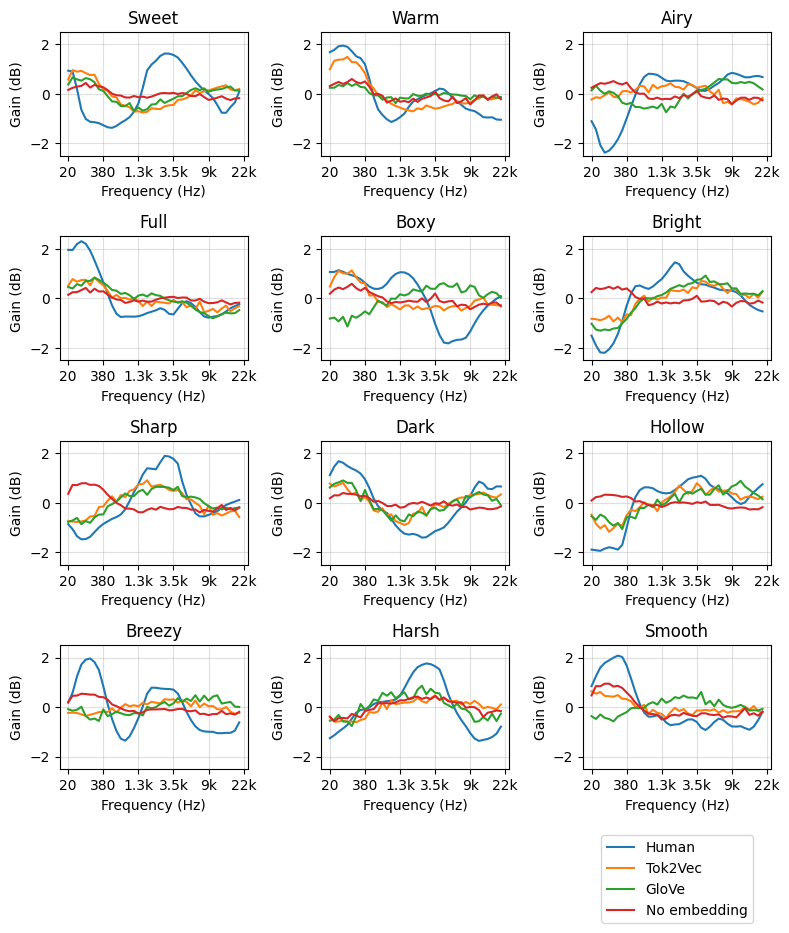

In [ ]:

plt.figure(figsize=[8.0, 10.0])

for i, k in enumerate(human_labels.keys()):
  test_word = k

  # test_words = [test_word]
  # test_words_vec = vec2(np.array([[s] for s in test_words])).numpy()
  # p = model_spacy.predict(test_words_vec)
  # # y_test = (y_test - mmin) / (mmax - mmin)
  # spacy_preds[test_words[0]] = p[0, :] * (mmax - mmin) + mmin

  # test_words = [test_word]
  # test_words_vec = vec2(np.array([[s] for s in test_words])).numpy()
  # p = model_glove.predict(test_words_vec)
  # # y_test = (y_test - mmin) / (mmax - mmin)
  # glove_preds[test_words[0]] = p[0, :] * (mmax - mmin) + mmin

  # test_words = [test_word]
  # test_words_vec = vec2(np.array([[s] for s in test_words])).numpy()
  # p = model_random.predict(test_words_vec)
  # # y_test = (y_test - mmin) / (mmax - mmin)
  # random_preds[test_words[0]] = p[0, :] * (mmax - mmin) + mmin

  plt.subplot(4, 3, i+1)

  plt.plot(human_labels[test_word], label="Human")
  plt.plot(spacy_preds[test_word], label= "Tok2Vec")
  plt.plot(glove_preds[test_word], label= "GloVe")
  plt.plot(random_preds[test_word], label= "No embedding")
  #plt.plot(p_hot_2[0, :], label="pred_hot_random")
  plt.title(test_word.capitalize())
  plt.xticks(ticks=[0, 8, 16, 24, 32, 40], labels=freq_labels)
  plt.xlabel("Frequency (Hz)")
  plt.grid(visible=True, axis='both', which='major', alpha=0.4)
  plt.ylim((-2.5, +2.5))
  plt.ylabel("Gain (dB)")
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -1.3))
plt.tight_layout()

f = "/content/drive/MyDrive/audio-and-word-embeddings/trained models on 19-11-21/semantic plots on 4-12-21/fold_3and4" + '-plot.pdf'
plt.savefig(f, format='pdf')
plt.show()

In [ ]:
tf.keras.metrics.mean_absolute_error((np.array(human_labels["crisp"]) - mmin) / (mmax - mmin), (np.array(spacy_preds["crisp"]) - mmin) / (mmax - mmin)).numpy()

0.06290142493479768

In [ ]:
(y_train - mmin) / (mmax - mmin)

In [ ]:
tf.keras.metrics.mean_absolute_error((np.array(human_labels["crisp"]) - mmin) / (mmax - mmin), (np.array(random_preds["crisp"]) - mmin) / (mmax - mmin)).numpy()

0.11135530049685594

In [ ]:
list(range(0, 41, 7))

[0, 7, 14, 21, 28, 35]

In [ ]:
[int(freqs[f]) for f in list(range(0, 40, 8))]

[20, 382, 1273, 3461, 8838]

In [ ]:
len(freqs)

40

In [ ]:
freq_labels = [   "20"       ,    "50",    "82"  ,   "119",
         "161",   "207",   "260",   "318"  ,
         "383",  "455",   "537",   "628",
         "729",   "843",   "971",  "1.1k",
        "1.3k",  "1.5k",  "1.7k",  "1.9k" ,
        "2.1k",  "2.4k",  "2.7k",  "3k",
        "3.4k",  "3.9k",  "4.3k",  "4.9k" ,
        "5.6k",  "6.2k",  "7k" ,  "7.8k",
        "8.8k",  "10k", "11.1k", "12.5k",
       "14k", "16k", "17.5k", "20k"]

In [ ]:
plt.rcdefaults()
plt.rcParams.update({'font.size': 10})

In [ ]:
# os.mkdir("/content/drive/MyDrive/audio-and-word-embeddings/trained models on 19-11-21/semantic plots/fold_" + str(fold_no) + "/")

In [ ]:
plt.figure(figsize=[6.0, 4.0])

plt.plot(human_labels[test_word], label="Human")
plt.plot(spacy_preds[test_word], label= "Spacy")
plt.plot(glove_preds[test_word], label= "GloVe")
plt.plot(random_preds[test_word], label= "Random")
#plt.plot(p_hot_2[0, :], label="pred_hot_random")
plt.title(test_word.capitalize())
plt.xticks(ticks=list(range(0, 40, 6)), labels=[int(freqs[f]) for f in list(range(0, 40, 6))])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain (dB)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

# f = "/content/drive/MyDrive/audio-and-word-embeddings/trained models on 19-11-21/semantic plots/fold_" + str(fold_no) + "/" + test_word + '-plot.pdf'
# plt.savefig(f, format='pdf')
plt.show()

KeyError: ignored

<Figure size 600x400 with 0 Axes>

In [ ]:
# glove_errors = np.zeros((4, 40))
# random_errors = np.zeros((4, 40))
# spacy_errors = np.zeros((4, 40))

In [ ]:
random_errors[fold_no-1, :] = a[1:-1]

NameError: ignored

In [ ]:
random_errors

array([[0.14672606, 0.15158707, 0.15397184, 0.15043323, 0.14437336,
        0.13771793, 0.128002  , 0.11330597, 0.09587285, 0.08229929,
        0.07997315, 0.08243603, 0.09092747, 0.09796234, 0.10288544,
        0.10293464, 0.10624732, 0.10933153, 0.10777954, 0.10372917,
        0.10181502, 0.10577617, 0.10686065, 0.10712929, 0.10987235,
        0.11265779, 0.10461616, 0.09261849, 0.08944263, 0.08926515,
        0.08816171, 0.0842859 , 0.08404453, 0.08219033, 0.07991655,
        0.0777767 , 0.07457303, 0.07445712, 0.07291421, 0.07244339],
       [0.13368343, 0.14361575, 0.14767073, 0.14702706, 0.14282511,
        0.14206979, 0.13553038, 0.13348766, 0.12026675, 0.1044995 ,
        0.08920353, 0.08349397, 0.08436172, 0.0830475 , 0.0826699 ,
        0.08177075, 0.08458184, 0.08779182, 0.08764084, 0.08261351,
        0.07996539, 0.08442305, 0.09067132, 0.09114341, 0.09543151,
        0.09781727, 0.09489278, 0.09169868, 0.08995194, 0.08858646,
        0.08977209, 0.09448709, 0.09392138, 0.0

In [ ]:
glove_errors

array([[0.14266598, 0.1475762 , 0.14818309, 0.14031643, 0.13687551,
        0.13049731, 0.1244605 , 0.11371098, 0.10151615, 0.08485496,
        0.07294849, 0.07368471, 0.08155301, 0.09084333, 0.09273427,
        0.09647013, 0.09565464, 0.09250659, 0.0991456 , 0.09614021,
        0.09479587, 0.10174631, 0.10090935, 0.10246039, 0.10906103,
        0.11782365, 0.11322671, 0.09871745, 0.09495571, 0.08941831,
        0.08866157, 0.08275086, 0.07660384, 0.07163891, 0.0691883 ,
        0.06258301, 0.05968888, 0.06333588, 0.06638245, 0.07282918],
       [0.12620734, 0.13259163, 0.13119805, 0.12635478, 0.11926957,
        0.11528537, 0.11301104, 0.11178108, 0.10680038, 0.09583876,
        0.08817011, 0.08604664, 0.08404551, 0.08310161, 0.0820396 ,
        0.08202126, 0.08333395, 0.08676426, 0.08632334, 0.08510744,
        0.08261617, 0.08610518, 0.08857562, 0.08786239, 0.0899177 ,
        0.09486414, 0.0958271 , 0.09352869, 0.08885109, 0.08433282,
        0.08032043, 0.08118199, 0.07888939, 0.0

In [ ]:
# glove_errors[fold_no-1, :] = a[1:-1]

In [ ]:
# random_errors[fold_no-1, :] = a[1:-1]

In [ ]:
glove_errors

array([[0.13755421, 0.1396452 , 0.13612346, 0.12373446, 0.12074965,
        0.11381179, 0.10932447, 0.10066361, 0.09420834, 0.08807136,
        0.08476207, 0.08418852, 0.08796839, 0.09111449, 0.09045497,
        0.09397399, 0.09195255, 0.09371065, 0.0993262 , 0.0936408 ,
        0.08629282, 0.08820547, 0.08754198, 0.08550922, 0.09392534,
        0.10751449, 0.10883494, 0.09804237, 0.09348929, 0.08710277,
        0.08324103, 0.0785781 , 0.07514553, 0.06894402, 0.06793765,
        0.06203496, 0.06468885, 0.06992143, 0.07503118, 0.07926218],
       [0.12223949, 0.12817888, 0.12811247, 0.12303472, 0.1162099 ,
        0.11231099, 0.11135988, 0.10766681, 0.0959145 , 0.08120596,
        0.07030971, 0.06776853, 0.06995264, 0.07299211, 0.07488444,
        0.07302924, 0.07495072, 0.08072387, 0.08580989, 0.08335711,
        0.07803944, 0.08412658, 0.08480229, 0.08499889, 0.08588581,
        0.08300244, 0.07764572, 0.07448611, 0.07235067, 0.07168569,
        0.07116115, 0.07480101, 0.07693098, 0.0

In [ ]:
np.save("glove-errors.npy", glove_errors)

In [ ]:
random_errors

array([[0.14813338, 0.15599269, 0.15754308, 0.15111631, 0.14365815,
        0.13560215, 0.12391359, 0.10894866, 0.09353616, 0.08385293,
        0.08712653, 0.09155924, 0.09562307, 0.0999539 , 0.10259251,
        0.10099468, 0.10274956, 0.10597059, 0.10414182, 0.09752549,
        0.09142748, 0.08985135, 0.08971549, 0.09288812, 0.10141633,
        0.11407035, 0.11370226, 0.10431782, 0.10016564, 0.09717972,
        0.09300926, 0.08993675, 0.08675929, 0.0815896 , 0.07648925,
        0.07502963, 0.07765161, 0.0792432 , 0.08034223, 0.08076835],
       [0.13321033, 0.14128675, 0.14571786, 0.14433791, 0.13991556,
        0.13804717, 0.13236849, 0.12791348, 0.11129929, 0.09136323,
        0.0736391 , 0.07084675, 0.07231345, 0.07602841, 0.0779009 ,
        0.07566692, 0.07623532, 0.08132038, 0.0844874 , 0.07936505,
        0.0743329 , 0.0840323 , 0.09140407, 0.09220175, 0.09709015,
        0.09415228, 0.08474897, 0.07816503, 0.07760991, 0.07818993,
        0.08095171, 0.08680017, 0.0871143 , 0.0

In [ ]:
import seaborn as sns

In [ ]:
glove_pairs = []
for i in range(glove_errors.shape[0]):
  for j in range(glove_errors.shape[1]):
    glove_pairs.append([j, glove_errors[i][j]])

In [ ]:
freqs = np.flip(np.array([19682.15554706, 17565.97092647, 15674.69916541, 13984.43601948,
       12473.81784111, 11123.75155922,  9917.17335728,  8838.83299953,
        7875.10107956,  7013.7967549 ,  6244.03379044,  5556.08296459,
        4941.2490993 ,  4391.76115962,  3900.67403364,  3461.78075158,
        3069.53403435,  2718.97618016,  2405.67640291,  2125.67483041,
        1875.4324546 ,  1651.78640114,  1451.90995309,  1273.27682334,
        1113.62922426,   970.94933097,   843.43377754,   729.47086383,
         627.62018483,   536.59442499,   455.24308758,   382.53795322,
         317.560084  ,   259.48820883,   207.58834311,   161.20451182,
         119.75045841,    82.702235  ,    49.59158007,    20.        ]))

In [ ]:
all_pairs = []
for i in range(glove_errors.shape[0]):
  for j in range(glove_errors.shape[1]):
    all_pairs.append([j, glove_errors[i][j]*8, "GloVe"])

for i in range(random_errors.shape[0]):
  for j in range(random_errors.shape[1]):
    all_pairs.append([j, random_errors[i][j]*8, "No Embedding"])

In [ ]:
pd_g = pd.DataFrame(all_pairs, columns=["Freq", "Error", "Algorithm"])

In [ ]:
pd_g

Freq     Error     Algorithm
0       0  1.141328         GloVe
1       1  1.180610         GloVe
2       2  1.185465         GloVe
3       3  1.122531         GloVe
4       4  1.095004         GloVe
..    ...       ...           ...
315    35  0.663142  No Embedding
316    36  0.667805  No Embedding
317    37  0.651441  No Embedding
318    38  0.636615  No Embedding
319    39  0.649280  No Embedding

[320 rows x 3 columns]

In [ ]:
freqs

array([   20.        ,    49.59158007,    82.702235  ,   119.75045841,
         161.20451182,   207.58834311,   259.48820883,   317.560084  ,
         382.53795322,   455.24308758,   536.59442499,   627.62018483,
         729.47086383,   843.43377754,   970.94933097,  1113.62922426,
        1273.27682334,  1451.90995309,  1651.78640114,  1875.4324546 ,
        2125.67483041,  2405.67640291,  2718.97618016,  3069.53403435,
        3461.78075158,  3900.67403364,  4391.76115962,  4941.2490993 ,
        5556.08296459,  6244.03379044,  7013.7967549 ,  7875.10107956,
        8838.83299953,  9917.17335728, 11123.75155922, 12473.81784111,
       13984.43601948, 15674.69916541, 17565.97092647, 19682.15554706])

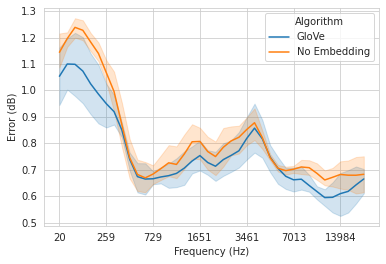

In [ ]:
"""
Refer to https://seaborn.pydata.org/generated/seaborn.lineplot.html
"""
#sns.set_style('whitegrid')
g = sns.lineplot(data=pd_g, x="Freq", y="Error", hue="Algorithm")
g.set(xticks=list(range(0, 40, 6)))
g.set_xticklabels(labels=[int(freqs[f]) for f in list(range(0, 40, 6))])
g.set_xlabel('Frequency (Hz)')
g.set_ylabel('Error (dB)')
plt.savefig("errors-glove-without-embed.pdf")

In [ ]:
[int(freqs[f]) for f in list(range(0, 40, 6))]

[20, 259, 729, 1651, 3461, 7013, 13984]

In [ ]:
list(range(0, 40, 5))

[0, 5, 10, 15, 20, 25, 30, 35]

In [ ]:
glove_errors = np.array([0.135219007730484,
 0.1417078971862793,
 0.1443885713815689,
 0.13753406703472137,
 0.1366240680217743,
 0.12939420342445374,
 0.1257573813199997,
 0.11426322162151337,
 0.10162712633609772,
 0.08791664987802505,
 0.07571948319673538,
 0.07307905703783035,
 0.07886607199907303,
 0.08663317561149597,
 0.08912739157676697,
 0.0950593650341034,
 0.0950314849615097,
 0.09708578884601593,
 0.10072147846221924,
 0.09449493139982224,
 0.09113290160894394,
 0.09719860553741455,
 0.09549058973789215,
 0.09670919179916382,
 0.10486605763435364,
 0.11428825557231903,
 0.11095452308654785,
 0.09553250670433044,
 0.0905599445104599,
 0.08525009453296661,
 0.08354081958532333,
 0.07920876145362854,
 0.07765884697437286,
 0.07271337509155273,
 0.07020962238311768,
 0.06319916248321533,
 0.06490464508533478,
 0.06750790029764175,
 0.06842325627803802,
 0.07207849621772766])

In [ ]:
random_errors = np.array([ 0.1431814432144165,
 0.1501283049583435,
 0.15748460590839386,
 0.15647652745246887,
 0.1503400057554245,
 0.14328855276107788,
 0.1322924941778183,
 0.11994200944900513,
 0.10216674208641052,
 0.08562064170837402,
 0.08218886703252792,
 0.08332497626543045,
 0.0897541418671608,
 0.09562253206968307,
 0.1016845703125,
 0.10460406541824341,
 0.11119204014539719,
 0.11740073561668396,
 0.11216245591640472,
 0.10222414135932922,
 0.09848218411207199,
 0.10147435963153839,
 0.10269896686077118,
 0.10259169340133667,
 0.1069965809583664,
 0.11279480904340744,
 0.10516101121902466,
 0.09302200376987457,
 0.08821860700845718,
 0.08890654146671295,
 0.0884171649813652,
 0.08589757978916168,
 0.08702334761619568,
 0.0832567811012268,
 0.07915061712265015,
 0.0777226984500885,
 0.0806078240275383,
 0.07900112867355347,
 0.07602708041667938,
 0.07244767993688583])

In [ ]:
random_errors.mean()

0.0998336653225124

In [ ]:
(random_errors - glove_errors) * 8

array([ 0.06369948,  0.06736326,  0.10476828,  0.15153968,  0.1097275 ,
        0.11115479,  0.0522809 ,  0.0454303 ,  0.00431693, -0.01836807,
        0.05175507,  0.08196735,  0.08710456,  0.07191485,  0.10045743,
        0.0763576 ,  0.12928444,  0.16251957,  0.09152782,  0.06183368,
        0.05879426,  0.03420603,  0.05766702,  0.04706001,  0.01704419,
       -0.01194757, -0.04634809, -0.02008402, -0.0187307 ,  0.02925158,
        0.03901076,  0.05351055,  0.07491601,  0.08434725,  0.07152796,
        0.11618829,  0.12562543,  0.09194583,  0.06083059,  0.00295347])

In [ ]:
glove_errors *8

array([1.08175206, 1.13366318, 1.15510857, 1.10027254, 1.09299254,
       1.03515363, 1.00605905, 0.91410577, 0.81301701, 0.7033332 ,
       0.60575587, 0.58463246, 0.63092858, 0.6930654 , 0.71301913,
       0.76047492, 0.76025188, 0.77668631, 0.80577183, 0.75595945,
       0.72906321, 0.77758884, 0.76392472, 0.77367353, 0.83892846,
       0.91430604, 0.88763618, 0.76426005, 0.72447956, 0.68200076,
       0.66832656, 0.63367009, 0.62127078, 0.581707  , 0.56167698,
       0.5055933 , 0.51923716, 0.5400632 , 0.54738605, 0.57662797])

In [ ]:
random_errors *8

array([1.14545155, 1.20102644, 1.25987685, 1.25181222, 1.20272005,
       1.14630842, 1.05833995, 0.95953608, 0.81733394, 0.68496513,
       0.65751094, 0.66659981, 0.71803313, 0.76498026, 0.81347656,
       0.83683252, 0.88953632, 0.93920588, 0.89729965, 0.81779313,
       0.78785747, 0.81179488, 0.82159173, 0.82073355, 0.85597265,
       0.90235847, 0.84128809, 0.74417603, 0.70574886, 0.71125233,
       0.70733732, 0.68718064, 0.69618678, 0.66605425, 0.63320494,
       0.62178159, 0.64486259, 0.63200903, 0.60821664, 0.57958144])

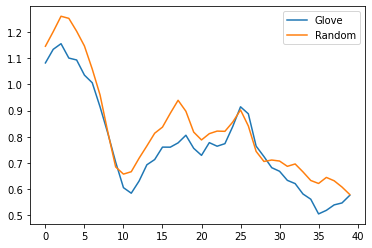

In [ ]:
plt.plot(glove_errors*8, label='Glove')
plt.plot(random_errors*8, label='Random')
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.1042 - mean_abs_error_0: 0.1432 - mean_abs_error_1: 0.1501 - mean_abs_error_2: 0.1575 - mean_abs_error_3: 0.1565 - mean_abs_error_4: 0.1503 - mean_absolute_percentage_error: 23.3665


[0.1041996031999588,
 0.1431814432144165,
 0.1501283049583435,
 0.15748460590839386,
 0.15647652745246887,
 0.1503400057554245,
 23.366485595703125]

In [ ]:
b

0.13909472525119781

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=500, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=20000, validation_data=(x_test, y_test), verbose=2, callbacks=callback)

Epoch 1/20000
26/26 - 1s - loss: 0.1050 - mean_absolute_percentage_error: 23.3024 - val_loss: 0.1042 - val_mean_absolute_percentage_error: 23.3491 - 1s/epoch - 42ms/step
Epoch 2/20000
26/26 - 0s - loss: 0.1049 - mean_absolute_percentage_error: 23.3587 - val_loss: 0.1041 - val_mean_absolute_percentage_error: 23.3394 - 132ms/epoch - 5ms/step
Epoch 3/20000
26/26 - 0s - loss: 0.1048 - mean_absolute_percentage_error: 23.2787 - val_loss: 0.1041 - val_mean_absolute_percentage_error: 23.3274 - 153ms/epoch - 6ms/step
Epoch 4/20000
26/26 - 0s - loss: 0.1048 - mean_absolute_percentage_error: 23.2877 - val_loss: 0.1040 - val_mean_absolute_percentage_error: 23.3199 - 140ms/epoch - 5ms/step
Epoch 5/20000
26/26 - 0s - loss: 0.1047 - mean_absolute_percentage_error: 23.2646 - val_loss: 0.1040 - val_mean_absolute_percentage_error: 23.3126 - 142ms/epoch - 5ms/step
Epoch 6/20000
26/26 - 0s - loss: 0.1047 - mean_absolute_percentage_error: 23.3490 - val_loss: 0.1040 - val_mean_absolute_percentage_error: 23.

In [ ]:
model.save_weights("random-4.h5")

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.0951 - mean_absolute_percentage_error: 21.4712


[0.0950637087225914, 21.47121810913086]

In [ ]:
#Spacey fold-1
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0968 - mean_absolute_percentage_error: 21.4078


[0.09683884680271149, 21.40778923034668]

In [ ]:
#Spacey fold-2
model.evaluate(x_test, y_test)

8/8 [==============================] - 0s 3ms/step - loss: 0.0965 - mean_absolute_percentage_error: 21.4794


[0.09654112160205841, 21.479389190673828]

In [ ]:
#Spacey fold-3
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.1005 - mean_absolute_percentage_error: 22.1928


[0.10048843920230865, 22.192846298217773]

In [ ]:
model.save_weights("spacey-random-2.h5")

In [ ]:
# Random model evaluation with trainable=True
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1022 - mean_absolute_percentage_error: 22.9253


[0.10219655930995941, 22.9252872467041]

In [ ]:
# Random model evaluation with trainable=True 
# fold-2
model.evaluate(x_test, y_test)

8/8 [==============================] - 0s 4ms/step - loss: 0.1001 - mean_absolute_percentage_error: 22.4177


[0.10008297860622406, 22.41767692565918]

In [ ]:
# Random model evaluation with trainable=True 
# fold-3
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.1053 - mean_absolute_percentage_error: 23.4472


[0.10527175664901733, 23.44719696044922]

In [ ]:
# Evaluate Glove embeddings
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1025 - mean_absolute_percentage_error: 22.9613


[0.10250413417816162, 22.96133041381836]

In [ ]:
# Evaluate Glove 840B embeddings
model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.0981 - mean_absolute_percentage_error: 21.8906


[0.09810765832662582, 21.890634536743164]

In [ ]:
# Evaluate Glove 840B embeddings
# Fold-2
model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.0983 - mean_absolute_percentage_error: 21.9913


[0.09829055517911911, 21.99127197265625]

In [ ]:
# Evaluate dict2vec embeddings
model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.1009 - mean_absolute_percentage_error: 22.7811


[0.1008799746632576, 22.78107261657715]

In [ ]:
# Random embedding evaluation with trainable=False
model.evaluate(x_val, y_val)

4/4 [==============================] - 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.1036 - mean_absolute_percentage_error: 23.1630


[0.007584931328892708, 0.10357855260372162, 23.163009643554688]

In [ ]:
# Random initialisation with sigmoid outputs
model.evaluate(x_val, y_val)

4/4 [==============================] - 0s 3ms/step - loss: 0.0078 - mean_absolute_error: 0.1051 - mean_absolute_percentage_error: 23.3730


[0.007769592572003603, 0.10514616221189499, 23.373031616210938]

In [ ]:
model.evaluate(x_val, y_val)

4/4 [==============================] - 0s 5ms/step - loss: 0.0955 - mean_absolute_error: 0.0955


[0.09548965096473694, 0.09548965096473694]

In [ ]:
model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.1017 - mean_absolute_percentage_error: 22.9850


[0.10165008157491684, 22.985048294067383]

In [ ]:
# model.evaluate(x_val, y_val)

In [ ]:
# model.evaluate(x_val, y_val)

In [ ]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.1101 - mean_absolute_error: 0.1101 - mean_absolute_percentage_error: 25.5140


[0.11014499515295029, 0.11014499515295029, 25.513978958129883]

In [ ]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.1124 - mean_absolute_error: 0.1124 - mean_absolute_percentage_error: 25.9182


[0.1124136671423912, 0.1124136671423912, 25.918169021606445]

In [ ]:
model.evaluate(x_train, y_train)

17/17 [==============================] - 0s 1ms/step - loss: 0.0073 - mean_absolute_error: 0.1013


[0.007343118079006672, 0.10125716030597687]

In [ ]:
len(history.history['loss'])

1339

# Plot bar graphs of PCM

In [ ]:
import pandas as pd


In [ ]:
plt.rcdefaults()
plt.rcParams.update({'font.size': 10})

In [ ]:
data = [[2.48960608, 2.567595134, 3.314264994, 3.297643212],
        [10.36477587, 8.654113723, 6.404991508, 16.60050453],
[8.064466194, 9.383650245, 9.691981799, 10.36105911],
[92.97194214, 18.04544089, 14.52130978, 16.22519194]]

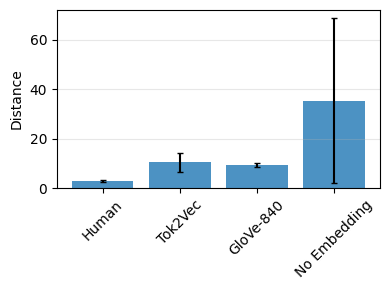

In [ ]:
"""
Vertical bar graph:
Plot mean and std of F-measure on the val set using bar graphs for different dataset sizes. 
"""

f_measures_dict = {}

for i, d in enumerate(["Human", "Tok2Vec", "GloVe-840", "No Embedding"]):
  f_measures_dict[d] = data[i]

f_np = np.array(list(f_measures_dict.values()))
f_means = np.mean(f_np, axis = 1)
f_std = np.std(f_np, axis = 1)
# print(np.mean(nn, axis = 1))


y_labels = [kk for kk in list(f_measures_dict.keys())]
y_pos = np.arange(len(y_labels))

x_values = f_means

fig, ax = plt.subplots(figsize =(4, 3)) 

# for i, v in enumerate(f_means):
#     ax.text(i-0.25, v+f_std[i]+0.5, str(round(v, 2)), color='black')  
#     # ax.text(v+0.7, i - 0.2, str(v) + u"\u00B1" + str(round(f_std[i], 2)), color='black')


#plt.figure(figsize=[5, 4])
ax.bar(y_pos, f_means, yerr=f_std,  align='center', ecolor='black', capsize=2, alpha=0.8)
plt.xticks(y_pos, y_labels, rotation=45)
#ax.set_ylim((82.0, 100.0))
#ax.set_xlabel('No. of examples')
ax.grid(axis='y', alpha=0.3)
ax.set_ylabel('Distance')
#ax.set_title("Validation")


plt.tight_layout()

f = 'distance-plot.pdf'
plt.savefig(f, format='pdf')

plt.show()

In [ ]:
pd_g = pd.DataFrame(all_pairs, columns=["Freq", "Error", "Algorithm"])

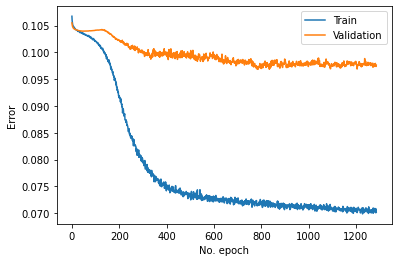

In [ ]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Error')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

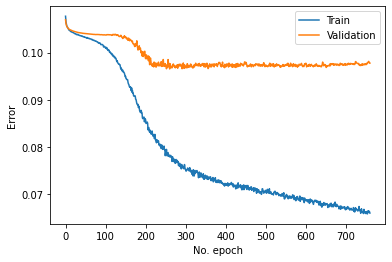

In [ ]:
#Spacey fold-2
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Error')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

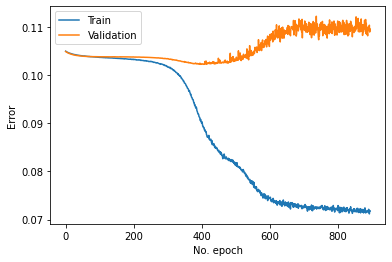

In [ ]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Error')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

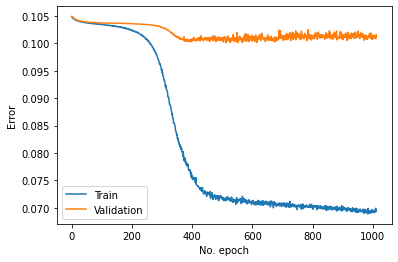

In [ ]:
# Random fold-2
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Error')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

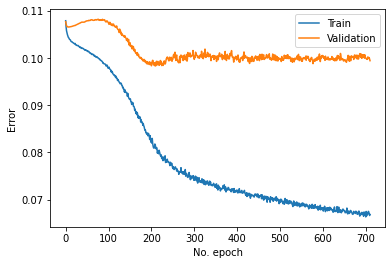

In [ ]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Error')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

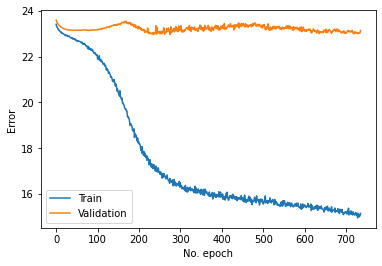

In [ ]:
plt.plot(history.history['mean_absolute_percentage_error'], label='Train')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='Validation')
plt.ylabel('Error')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

In [ ]:
model.save_weights('audio_embedding.h5')

In [ ]:
model.save_weights("/content/drive/MyDrive/audio-and-word-embeddings/E3/model_5.h5")

In [ ]:
model.evaluate(x=x_test, y=y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.1122


[0.009296669624745846, 0.11216448247432709]

In [ ]:
model.evaluate(x=x_test, y=y_test)

3/3 [==============================] - 0s 3ms/step - loss: 1.2906 - mean_absolute_error: 0.9110


[1.2906494140625, 0.9109524488449097]

In [ ]:
model.evaluate(x=x_test, y=y_test)

3/3 [==============================] - 0s 3ms/step - loss: 1.2765 - mean_absolute_error: 0.9085


[1.276533603668213, 0.9084798097610474]

In [ ]:
model.evaluate(x=x_test, y=y_test)

3/3 [==============================] - 0s 2ms/step - loss: 1.2765 - mean_absolute_error: 0.9085


[1.276533603668213, 0.9084798097610474]

In [ ]:
model.evaluate(x=x_test, y=y_test)

3/3 [==============================] - 0s 3ms/step - loss: 1.2868 - mean_absolute_error: 0.9070


[1.2867929935455322, 0.906987726688385]

In [ ]:
# random
model.evaluate(x=x_test, y=y_test)

3/3 [==============================] - 0s 2ms/step - loss: 1.2409 - mean_absolute_error: 0.8985


[1.2409207820892334, 0.8985073566436768]

In [ ]:
# +3 db
model.evaluate(x=x_test, y=y_test)

3/3 [==============================] - 0s 3ms/step - loss: 1.2669 - mean_absolute_error: 0.9164


[1.2669308185577393, 0.9164082407951355]

In [ ]:
# +3 db
model.evaluate(x=x_test, y=y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.1357 - mean_absolute_error: 0.2919


[0.1357341855764389, 0.2918856143951416]

In [ ]:
model.save_weights("/content/drive/MyDrive/audio-and-word-embeddings/E2/model_3.h5")

In [ ]:
model.save("/content/drive/MyDrive/audio-and-word-embeddings/E2/model_3_backup.h5")

In [ ]:
model.save_weights("/content/drive/MyDrive/audio-and-word-embeddings/E2/model_3_backup_weights.h5")

In [ ]:
model.load_weights("/content/drive/MyDrive/audio-and-word-embeddings/E2/model_3.h5")

# Testing

In [ ]:
test_words = ["metallic"]
test_words_vec = vec2(np.array([[s] for s in test_words])).numpy()
p = model.predict(test_words_vec)
# y_test = (y_test - mmin) / (mmax - mmin)
p = p * (mmax - mmin) + mmin

In [ ]:
p

array([[ 0.25198317,  0.31728363,  0.35321951,  0.39033985,  0.35700226,
         0.36942863,  0.41295958,  0.39898539,  0.33982277,  0.15455484,
         0.01975155, -0.03686285, -0.11283827, -0.12049627, -0.21099925,
        -0.21291518, -0.22045732, -0.17478561, -0.11642528, -0.1356082 ,
        -0.0730381 , -0.09327865, -0.06216931, -0.113626  , -0.11594915,
        -0.11071515, -0.07767868, -0.07670951, -0.08573151, -0.15321183,
        -0.18627381, -0.20000625, -0.25737882, -0.22282195, -0.19108486,
        -0.14155269, -0.15687323, -0.19995546, -0.21499968, -0.18873048]])

In [ ]:
p

array([[ 0.25198317,  0.31728363,  0.35321951,  0.39033985,  0.35700226,
         0.36942863,  0.41295958,  0.39898539,  0.33982277,  0.15455484,
         0.01975155, -0.03686285, -0.11283827, -0.12049627, -0.21099925,
        -0.21291518, -0.22045732, -0.17478561, -0.11642528, -0.1356082 ,
        -0.0730381 , -0.09327865, -0.06216931, -0.113626  , -0.11594915,
        -0.11071515, -0.07767868, -0.07670951, -0.08573151, -0.15321183,
        -0.18627381, -0.20000625, -0.25737882, -0.22282195, -0.19108486,
        -0.14155269, -0.15687323, -0.19995546, -0.21499968, -0.18873048]])

In [ ]:
p2.shape

NameError: ignored

In [ ]:
!pip install git+https://github.com/detly/gammatone.git

  Cloning https://github.com/detly/gammatone.git to /tmp/pip-req-build-duvsnf7j
  Running command git clone -q https://github.com/detly/gammatone.git /tmp/pip-req-build-duvsnf7j
     |████████████████████████████████| 154 kB 9.2 MB/s 
  Created wheel for Gammatone: filename=Gammatone-1.0-py3-none-any.whl size=21797 sha256=fd4a78d633dfd39e7631382f18b75d8105f9a1db830bc0f12343a9f5271877c4
  Stored in directory: /tmp/pip-ephem-wheel-cache-igeo5oor/wheels/07/b9/a7/356576d1172ea99bf71c5f5502bb20e951769a34b4e86fe6cc
Successfully built Gammatone


In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1FV5KDNVsBpb1fRp2kmyWxDhL1EfvvqAP' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1FV5KDNVsBpb1fRp2kmyWxDhL1EfvvqAP" -O signals.zip && rm -rf /tmp/cookies.txt

--2021-11-15 16:04:02--  https://docs.google.com/uc?export=download&confirm=f1Rz&id=1FV5KDNVsBpb1fRp2kmyWxDhL1EfvvqAP
Resolving docs.google.com (docs.google.com)... 74.125.142.101, 74.125.142.113, 74.125.142.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-1k-docs.googleusercontent.com/docs/securesc/qimeum32tkdcef1qh0q3ne577glu3tbh/7p2opllg2jae8do6uag70ctfcv83vpeh/1636992225000/04739181468756608208/04285095385438852560Z/1FV5KDNVsBpb1fRp2kmyWxDhL1EfvvqAP?e=download [following]
--2021-11-15 16:04:02--  https://doc-0c-1k-docs.googleusercontent.com/docs/securesc/qimeum32tkdcef1qh0q3ne577glu3tbh/7p2opllg2jae8do6uag70ctfcv83vpeh/1636992225000/04739181468756608208/04285095385438852560Z/1FV5KDNVsBpb1fRp2kmyWxDhL1EfvvqAP?e=download
Resolving doc-0c-1k-docs.googleusercontent.com (doc-0c-1k-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1FV5KDNVsBpb1fRp2kmyWxDhL1EfvvqAP' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1FV5KDNVsBpb1fRp2kmyWxDhL1EfvvqAP" -O signals.zip && rm -rf /tmp/cookies.txt
!unzip signals.zip

--2021-11-15 16:04:05--  https://docs.google.com/uc?export=download&confirm=YfQk&id=1FV5KDNVsBpb1fRp2kmyWxDhL1EfvvqAP
Resolving docs.google.com (docs.google.com)... 74.125.142.139, 74.125.142.113, 74.125.142.101, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-ak-docs.googleusercontent.com/docs/securesc/ou5u6ltg5p02e8ponq6kp3uq1tf5m506/idl603ka2v4upnebglujoar4n9jkjh68/1636992225000/04739181468756608208/15164984648692661642Z/1FV5KDNVsBpb1fRp2kmyWxDhL1EfvvqAP?e=download [following]
--2021-11-15 16:04:05--  https://doc-04-ak-docs.googleusercontent.com/docs/securesc/ou5u6ltg5p02e8ponq6kp3uq1tf5m506/idl603ka2v4upnebglujoar4n9jkjh68/1636992225000/04739181468756608208/15164984648692661642Z/1FV5KDNVsBpb1fRp2kmyWxDhL1EfvvqAP?e=download
Resolving doc-04-ak-docs.googleusercontent.com (doc-04-ak-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting

In [ ]:
from gammatone import filters 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display

In [ ]:
# Load and listen to original audio sample

x, fs = sf.read('signals/e_gtr_short.wav')
print(f"Loaded {x.shape[0]} samples at fs={fs}")
IPython.display.Audio(x,rate=fs)

Loaded 458317 samples at fs=44100


In [ ]:
# A list of terms taken from the SocialFX Dataset
gain_vector = {}
gain_vector['hot'] = np.flip(np.array([0.797209, -1.287298455, -1.532964082, -1.506539385, -1.396973938, -1.271198913, -1.017866669, -0.528729007, 0.165573584, 0.754400175, 1.073992036, 1.282210725, 1.442060062, 1.568685481, 1.653999697, 1.648503806, 1.53967359, 1.580347112, 1.577686577, 1.205675471, 0.676758791, 0.252821123, 0.075167078, -0.033101099, -0.089115047, -0.1365393, -0.143565939, -0.084299287, -0.051027767, -0.038591153, -0.089749952, -0.192244295, -0.345006204, -0.529255497, -0.724989266, -0.864740603, -0.916542181, -0.839557577, -0.823611993, -0.980958406]))
gain_vector['warm'] = np.flip(np.array([0.806225, 1.970152522, 2.063643883, 2.109621503, 2.019063089, 1.833557153, 1.54050257, 1.253791039, 1.124354285, 0.912120468, 0.479917036, -0.176767683, -0.766548101, -0.982288412, -0.876476603, -0.871483715, -0.986591984, -1.095373269, -1.006018325, -0.665307271, -0.386414479, -0.282319476, -0.236480253, -0.182852135, -0.094328345, 0.115664993, 0.429528178, 0.443207819, 0.225592816, -0.061474359, -0.435409903, -0.866104454, -1.093506922, -1.048872922, -0.838433617, -0.650190554, -0.567333094, -0.666182754, -0.760821358, -0.622340305]))
gain_vector['cold'] = np.flip(np.array([0.56672, -2.034095236, -2.054271815, -2.050160073, -1.971859231, -1.880512554, -1.774836615, -1.588498521, -1.323855231, -0.929419044, -0.477990841, 0.001836709, 0.425480213, 0.710446169, 0.736694949, 0.743315275, 0.699904753, 0.573891718, 0.417793993, 0.336596002, 0.362311733, 0.393507005, 0.31382609, 0.206445573, 0.156956594, 0.131116367, 0.096204939, 0.101053811, 0.198440373, 0.395838345, 0.665566916, 0.984723167, 1.146000944, 0.996436067, 0.733647623, 0.466518535, 0.551724202, 0.883208881, 0.863160135, 0.817721258]))
gain_vector['relaxing'] = np.flip(np.array([0.667283, 2.12661933, 1.972813587, 2.076840264, 2.029614099, 1.828261577, 1.529357681, 1.106721532, 0.574096502, 0.036519114, -0.369146913, -0.763306351, -1.214185152, -1.591751218, -1.730069773, -1.572405592, -1.283399138, -1.112799795, -0.831637822, -0.283981666, 0.018265935, 0.070173219, -0.021844884, -0.107969439, -0.090211942, 0.099998408, 0.417992371, 0.497223147, 0.322845287, 0.05663085, -0.207602229, -0.375132475, -0.362059187, -0.237172682, -0.145072176, -0.271109014, -0.57736182, -0.58486884, -0.355700261, -0.28738431]))
gain_vector['soothing'] = np.flip(np.array([0.668623, -0.342018362, 0.026666401, 0.446729242, 0.870928285, 1.273066751, 1.605112245, 1.788250756, 1.713096735, 1.410331198, 0.944353776, 0.307533749, -0.378830743, -1.014190533, -1.536209856, -1.920257823, -2.106073864, -2.078396015, -1.942651727, -1.623318874, -1.065090653, -0.478780769, 0.026683737, 0.352843499, 0.58902601, 0.684407324, 0.492285815, 0.224337514, 0.199443126, 0.277549186, 0.356415253, 0.388200774, 0.289154264, 0.096006927, 0.001571427, 0.070259291, 0.231924942, 0.189760673, -0.05734363, -0.202312582]))
gain_vector['harsh'] = np.flip(np.array([0.444456, -0.763625387, -1.097657151, -1.109271826, -0.828296799, -0.504376203, -0.175019514, 0.112461643, 0.343172372, 0.48092289, 0.578483124, 0.793573687, 1.1619776, 1.550687911, 1.789115385, 1.813865965, 1.528659423, 1.337018759, 1.303155904, 1.032093521, 0.634841813, 0.406146777, 0.415351652, 0.425582285, 0.305761841, 0.050915992, -0.345361682, -0.840566551, -1.239371225, -1.504682027, -1.659385274, -1.677605366, -1.570754566, -1.349434626, -1.050155243, -0.736486167, -0.341679134, -0.02872275, 0.067719463, 0.195935989]))


In [ ]:
"cold" in train_word_set

False

In [ ]:
# Create filters
# - I have checked the center frequencies and implementation of the filters, and they all match up the same from the paper.
c_freqs = filters.centre_freqs(fs, 40, 20)
fcoefs = filters.make_erb_filters(fs, c_freqs, width=1.0)

In [ ]:
gain_vector['hot'].shape

(40,)

In [ ]:
c_freqs

array([19682.15554706, 17565.97092647, 15674.69916541, 13984.43601948,
       12473.81784111, 11123.75155922,  9917.17335728,  8838.83299953,
        7875.10107956,  7013.7967549 ,  6244.03379044,  5556.08296459,
        4941.2490993 ,  4391.76115962,  3900.67403364,  3461.78075158,
        3069.53403435,  2718.97618016,  2405.67640291,  2125.67483041,
        1875.4324546 ,  1651.78640114,  1451.90995309,  1273.27682334,
        1113.62922426,   970.94933097,   843.43377754,   729.47086383,
         627.62018483,   536.59442499,   455.24308758,   382.53795322,
         317.560084  ,   259.48820883,   207.58834311,   161.20451182,
         119.75045841,    82.702235  ,    49.59158007,    20.        ])

In [ ]:
test_word_set

['agitated',
 'aggravating',
 'congested',
 'cold',
 'metal',
 'tinny',
 'slow',
 'cosy',
 'brave',
 'damp',
 'jagged',
 'distant',
 'fresh',
 'lazy',
 'emotional',
 'anger',
 'whispered',
 'rousing',
 'children',
 'rain',
 'important',
 'fast',
 'music',
 'humble',
 'clarity',
 'cute',
 'bold',
 'splendid',
 'fast-paced',
 'muffled',
 'bag',
 'punchy',
 'spooky',
 'whispering',
 'tiger',
 'hero',
 'wild',
 'fiery',
 'small']

In [ ]:
val_word_set

['graceful',
 'caustic',
 'forgetful',
 'vibrant',
 'creepy',
 'high-pitched',
 'roll',
 'harmonious',
 'ecstasy',
 'cat',
 'meaty',
 'bassy',
 'fuzzy',
 'hot',
 'choppy',
 'rough',
 'fat',
 'prickly',
 'youthful',
 'poor',
 'harsh',
 'muddled',
 'fancy',
 'classy',
 'stormy',
 'disgusting',
 'blaring',
 'moody',
 'airy',
 'sad',
 'icy',
 'honest',
 'loud',
 'relaxed',
 'anticipation',
 'kind',
 'workout',
 'sprightly',
 'fire',
 'booming',
 'discombobulated',
 'mysterious',
 'tight',
 'distracting',
 'grainy',
 'obnoxious',
 'good',
 'hello',
 'grace',
 'sound',
 'hardness',
 'sea',
 'aggressive',
 'scabrous',
 'serious',
 'gentle',
 'gruff',
 'brash',
 'flow',
 'crash',
 'techno',
 'little',
 'high',
 'archaic',
 'game dog',
 'inspirational',
 'drums',
 'tremble',
 'eager',
 'smelly',
 'radical',
 'dry',
 'gradual',
 'full',
 'deafening',
 'darkness',
 'twangy',
 'edge']

In [ ]:
train_word_set

['big',
 'greasy',
 'aidan',
 'charming',
 'upbeat',
 'alluring',
 'sharp',
 'brillante',
 'grating',
 'heat',
 'rich',
 'moan',
 'hard',
 'confident',
 'coarse',
 'sinister',
 'frantic',
 'mournful',
 'frustration',
 'brass',
 'vintage',
 'tranquil',
 'rock',
 'metallic',
 'watery',
 'smooth',
 'sensual',
 'heart-warming',
 'wistful',
 'dull',
 'boxy',
 'pleasurable',
 'food',
 'clear',
 'pop',
 'safe',
 'groovy',
 'drive',
 'roar',
 'powerful',
 'soft',
 'elegant',
 'light',
 'chilly',
 'bear',
 'energized',
 'crunchy',
 'god',
 'steep',
 'foggy',
 'clash',
 'somber',
 'edgy',
 'rhythmic',
 'bouncy',
 'saccharine',
 'rumble',
 'placid',
 'wow',
 'squeaking',
 'favourable',
 'marvellous',
 'exciting',
 'melancholy',
 'guitar',
 'plodding',
 'joy',
 'tender',
 'oxygen',
 'winter',
 'solid',
 'invigorate',
 'boisterous',
 'helpful',
 'nice',
 'noisy',
 'frigid',
 'relaxing',
 'screeching',
 'dramatic',
 'cooing',
 'frosty',
 'surprised',
 'epic',
 'scared',
 'quiet',
 'quick',
 'lindo',

In [ ]:
model.load_weights("/content/spacey-2.h5")

In [ ]:
"harsh" in train_word_set

False

In [ ]:
# Apply filterbank to audio signal and apply a given gain waiting value  to each band.
# Select a term (from the list above) and listen.
filterbank_x = filters.erb_filterbank(x, fcoefs)
out = np.sum(filterbank_x.T * gain_vector['metal'],axis=1)
IPython.display.Audio(out,rate=fs)

KeyError: ignored

In [ ]:
"hot" in train_word_set

False

In [ ]:
len(val_word_set)

78

In [ ]:
test_words = ["harsh"]
test_words_vec = vec2(np.array([[s] for s in test_words])).numpy()
p = model.predict(test_words_vec)
# y_test = (y_test - mmin) / (mmax - mmin)
p_harsh = p * (mmax - mmin) + mmin

In [ ]:
mmax - mmin

array([8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8.])

In [ ]:
p_harsh

array([[ 0.22757673,  0.16734982,  0.29178286,  0.34401655,  0.28793335,
         0.32909489,  0.32275724,  0.1800561 ,  0.295228  ,  0.25934076,
         0.17672682,  0.02775478,  0.0312109 , -0.04825687, -0.01505971,
         0.00852394, -0.09934974,  0.0079546 ,  0.18866968,  0.07621098,
         0.1860137 ,  0.07186985,  0.1373229 , -0.0296514 ,  0.12340355,
        -0.03520989, -0.01443505, -0.00424647, -0.12974286, -0.16602898,
        -0.24568987, -0.28454304, -0.37195969, -0.38847947, -0.37691474,
        -0.3672595 , -0.38363767, -0.38062048, -0.43752837, -0.28230548]])

In [ ]:
test_words_vec

array([[229]])

In [ ]:
# Apply filterbank to audio signal and apply a given gain waiting value  to each band.
# Select a term (from the list above) and listen.
filterbank_x = filters.erb_filterbank(x, fcoefs)
out = np.sum(filterbank_x.T * np.flip(p[0, :]),axis=1)
IPython.display.Audio(out,rate=fs)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
p_sharp.shape

(1, 40)

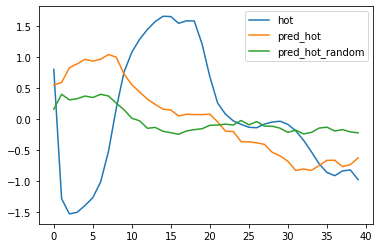

In [ ]:
plt.plot(np.flip(gain_vector['hot']), label="hot")
plt.plot(p_hot[0, :], label="pred_hot")
plt.plot(p_hot_2[0, :], label="pred_hot_random")
plt.legend()

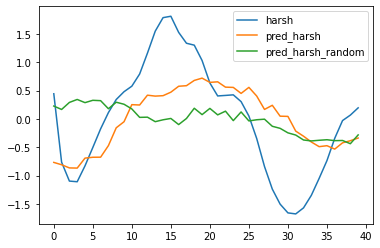

In [ ]:
plt.plot(np.flip(gain_vector['harsh']), label="harsh")
plt.plot(p_harsh[0, :], label="pred_harsh")
plt.plot(p_harsh_2[0, :], label="pred_harsh_random")
plt.legend()

In [ ]:
abs = tf.keras.losses.MeanAbsoluteError(
    reduction="auto", name="mean_absolute_error"
)

In [ ]:
abs(np.flip(gain_vector['harsh']), p_harsh[0, :]).numpy()

0.6505798101425171

In [ ]:
abs(np.flip(gain_vector['harsh']), p_harsh_2[0, :]).numpy()

0.8024032115936279

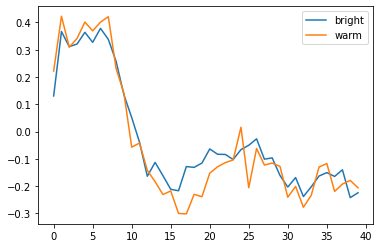

In [ ]:
plt.plot(p_bright[0, :], label="bright")
plt.plot(p_warm[0, :], label="warm")
plt.legend()

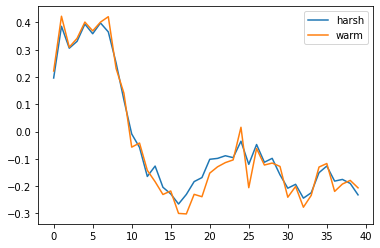

In [ ]:
plt.plot(p_harsh[0, :], label="harsh")
plt.plot(p_warm[0, :], label="warm")
plt.legend()

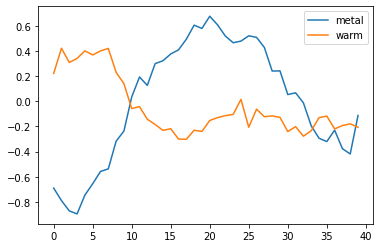

In [ ]:
plt.plot(p_metal[0, :], label="metal")
plt.plot(p_warm[0, :], label="warm")
plt.legend()

In [ ]:
# Apply filterbank to audio signal and apply a given gain waiting value  to each band.
# Select a term (from the list above) and listen.
filterbank_x = filters.erb_filterbank(x, fcoefs)
out = np.sum(filterbank_x.T * p2[0, :-1],axis=1)
IPython.display.Audio(out,rate=fs)

In [ ]:
"sharp" in train_word_set

True

# Testing with audio files

In [ ]:
# Load and listen to original audio sample

x, fs = sf.read('signals/e_gtr_short.wav')
print(f"Loaded {x.shape[0]} samples at fs={fs}")
IPython.display.Audio(x,rate=fs)

Loaded 458317 samples at fs=44100


In [ ]:
test_words = ["harsh"]
test_words_vec = vec2(np.array([[s] for s in test_words])).numpy()
p = model.predict(test_words_vec)
# y_test = (y_test - mmin) / (mmax - mmin)
p = p * (mmax - mmin) + mmin

# Apply filterbank to audio signal and apply a given gain waiting value  to each band.
# Select a term (from the list above) and listen.
filterbank_x = filters.erb_filterbank(x, fcoefs)
out = np.sum(filterbank_x.T * np.flip(p[0, :]),axis=1)
IPython.display.Audio(out,rate=fs)

In [ ]:
test_words = ["cold"]
test_words_vec = vec2(np.array([[s] for s in test_words])).numpy()
p2 = model.predict(test_words_vec)
# y_test = (y_test - mmin) / (mmax - mmin)
p2 = p2 * (mmax - mmin) + mmin

# Apply filterbank to audio signal and apply a given gain waiting value  to each band.
# Select a term (from the list above) and listen.
filterbank_x = filters.erb_filterbank(x, fcoefs)
out = np.sum(filterbank_x.T * np.flip(p2[0, :-1]),axis=1)
IPython.display.Audio(out,rate=fs)

In [ ]:
p == p2

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False]])

In [ ]:
"loud" in train_word_set

False